<a href="https://practicalai.me"><img src="https://raw.githubusercontent.com/practicalAI/images/master/images/rounded_logo.png" width="100" align="left" hspace="20px" vspace="20px"></a>

<img src="https://raw.githubusercontent.com/practicalAI/images/master/basic_ml/06_Multilayer_Perceptron/nn.png" width="200" vspace="10px" align="right">

<div align="left">
<h1>Multilayer Perceptron (MLP)</h1>

In this lesson, we will explore multilayer perceptrons (MLPs) which are a basic type of neural network. We will implement them using Tensorflow with Keras.
    
    相比较逻辑回归的步骤，是加了激活函数以进行非线性集合的分类，还有惩罚函数防过拟合。

<table align="center">
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/rounded_logo.png" width="25"><a target="_blank" href="https://practicalai.me"> View on practicalAI</a>
  </td>
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/colab_logo.png" width="25"><a target="_blank" href="https://colab.research.google.com/github/practicalAI/practicalAI/blob/master/notebooks/06_Multilayer_Perceptron.ipynb"> Run in Google Colab</a>
  </td>
  <td>
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/github_logo.png" width="22"><a target="_blank" href="https://github.com/practicalAI/practicalAI/blob/master/notebooks/basic_ml/06_Multilayer_Perceptron.ipynb"> View code on GitHub</a>
  </td>
</table>

# Overview

* **Objective:**  Predict the probability of class $y$ given the inputs $X$. Non-linearity is introduced to model the complex, non-linear data.
* **Advantages:**
  * Can model non-linear patterns in the data really well.
* **Disadvantages:**
  * Overfits easily.
  * Computationally intensive as network increases in size.
  * Not easily interpretable.
* **Miscellaneous:** Future neural network architectures that we'll see use the MLP as a modular unit for feed forward operations (affine transformation (XW) followed by a non-linear operation).

Our goal is to learn a model  𝑦̂   that models  𝑦  given  𝑋 . You'll notice that neural networks are just extensions of the generalized linear methods we've seen so far but with non-linear activation functions since our data will be highly non-linear.

<img src="https://raw.githubusercontent.com/practicalAI/images/master/basic_ml/06_Multilayer_Perceptron/nn.png" width="550">

$z_1 = XW_1$

$a_1 = f(z_1)$

$z_2 = a_1W_2$

$\hat{y} = softmax(z_2)$ # classification

* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W_1$ = 1st layer weights | $\in \mathbb{R}^{DXH}$ ($H$ is the number of hidden units in layer 1)
* $z_1$ = outputs from first layer  $\in \mathbb{R}^{NXH}$
* $f$ = non-linear activation function
*nn $a_1$ = activation applied first layer's outputs | $\in \mathbb{R}^{NXH}$
* $W_2$ = 2nd layer weights | $\in \mathbb{R}^{HXC}$ ($C$ is the number of classes)
* $z_2$ = outputs from second layer  $\in \mathbb{R}^{NXH}$
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NXC}$ ($N$ is the number of samples)

**Note**: We're going to leave out the bias terms $\beta$ to avoid further crowding the backpropagation calculations.

### Training

1. Randomly initialize the model's weights $W$ (we'll cover more effective initalization strategies later in this lesson).
2. Feed inputs $X$ into the model to do the forward pass and receive the probabilities.
  * $z_1 = XW_1$
  * $a_1 = f(z_1)$
  * $z_2 = a_1W_2$
  * $\hat{y} = softmax(z_2)$
3. Compare the predictions $\hat{y}$ (ex.  [0.3, 0.3, 0.4]]) with the actual target values $y$ (ex. class 2 would look like [0, 0, 1]) with the objective (cost) function to determine loss $J$. A common objective function for classification tasks is cross-entropy loss. 
  * $J(\theta) = - \sum_i y_i ln (\hat{y_i}) $
  * Since each input maps to exactly one class, our cross-entropy loss simplifies to: 
  * $J(\theta) = - \sum_i ln(\hat{y_i}) = - \sum_i ln (\frac{e^{X_iW_y}}{\sum_j e^{X_iW}}) $
4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights. 
 * $\frac{\partial{J}}{\partial{W_{2j}}} = \frac{\partial{J}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{W_{2j}}} = - \frac{1}{\hat{y}}\frac{\partial{\hat{y}}}{\partial{W_{2j}}} = - \frac{1}{\frac{e^{W_{2y}a_1}}{\sum_j e^{a_1W}}}\frac{\sum_j e^{a_1W}e^{a_1W_{2y}}0 - e^{a_1W_{2y}}e^{a_1W_{2j}}a_1}{(\sum_j e^{a_1W})^2} = \frac{a_1e^{a_1W_{2j}}}{\sum_j e^{a_1W}} = a_1\hat{y}$
  * $\frac{\partial{J}}{\partial{W_{2y}}} = \frac{\partial{J}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{W_{2y}}} = - \frac{1}{\hat{y}}\frac{\partial{\hat{y}}}{\partial{W_{2y}}} = - \frac{1}{\frac{e^{W_{2y}a_1}}{\sum_j e^{a_1W}}}\frac{\sum_j e^{a_1W}e^{a_1W_{2y}}a_1 - e^{a_1W_{2y}}e^{a_1W_{2y}}a_1}{(\sum_j e^{a_1W})^2} = \frac{1}{\hat{y}}(a_1\hat{y} - a_1\hat{y}^2) = a_1(\hat{y}-1)$
  * $ \frac{\partial{J}}{\partial{W_1}} = \frac{\partial{J}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{a_2}}  \frac{\partial{a_2}}{\partial{z_2}}  \frac{\partial{z_2}}{\partial{W_1}}  = W_2(\partial{scores})(\partial{ReLU})X $
   
5. Update the weights $W$ using a small learning rate $\alpha$. The updates will penalize the probabiltiy for the incorrect classes (j) and encourage a higher probability for the correct class (y).
  * $W_i = W_i - \alpha\frac{\partial{J}}{\partial{W_i}}$
6. Repeat steps 2 - 4 until model performs well.

# Set up

In [111]:
# Use TensorFlow 2.x
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [112]:
import os
import numpy as np
import tensorflow as tf

In [113]:
# Arguments
SEED = 1234
SHUFFLE = True
DATA_FILE = "spiral.csv"
INPUT_DIM = 2
NUM_CLASSES = 3
NUM_SAMPLES_PER_CLASS = 500
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15
NUM_EPOCHS = 10
BATCH_SIZE = 32
HIDDEN_DIM = 100
LEARNING_RATE = 1e-2

In [114]:
# Set seed for reproducability
np.random.seed(SEED)
tf.random.set_seed(SEED)
# tf.set_random_seed(SEED)

# Data

Download non-linear spiral data for a classification task.

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import urllib

In [145]:
# Upload data from GitHub to notebook's local drive
url = "https://raw.githubusercontent.com/practicalAI/practicalAI/master/data/spiral.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(DATA_FILE, 'wb') as fp:
    fp.write(html)

URLError: <urlopen error [Errno 61] Connection refused>

In [146]:
df = pd.read_csv(DATA_FILE, header=0)
df

,X1,X2,color
0,0.000000,0.000000,c1
1,-0.000457,0.001951,c1
2,0.001194,0.003826,c1
3,-0.000231,0.006008,c1
4,-0.000896,0.007966,c1
...,...,...,...
1495,-0.450801,0.883635,c2
1496,-0.572023,0.812897,c2
1497,-0.469445,0.878420,c2
1498,-0.641015,0.764915,c2


In [147]:
# Load data
df = pd.read_csv(DATA_FILE, header=0)
X = df[['X1', 'X2']].values
y = df['color'].values
df.head(5)

,X1,X2,color
0,0.000000,0.000000,c1
1,-0.000457,0.001951,c1
2,0.001194,0.003826,c1
3,-0.000231,0.006008,c1
4,-0.000896,0.007966,c1


In [148]:
print ("X: ", np.shape(X))
print ("y: ", np.shape(y))

X:  (1500, 2)
y:  (1500,)


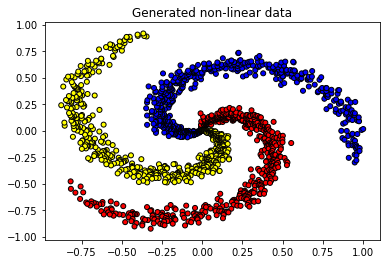

In [149]:
# Visualize data
plt.title("Generated non-linear data")
colors = {'c1': 'red', 'c2': 'yellow', 'c3': 'blue'}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], edgecolors='k', s=25)
plt.show()

# Split data

In [150]:
import collections
import json
from sklearn.model_selection import train_test_split

### Components

In [151]:
def train_val_test_split(X, y, val_size, test_size, shuffle):
    """Split data into train/val/test datasets.
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, shuffle=shuffle)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=val_size, stratify=y_train, shuffle=shuffle)
    return X_train, X_val, X_test, y_train, y_val, y_test

### Operations

In [152]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X=X, y=y, val_size=VAL_SIZE, test_size=TEST_SIZE, shuffle=SHUFFLE)
class_counts = dict(collections.Counter(y))
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"X_train[0]: {X_train[0]}")
print (f"y_train[0]: {y_train[0]}")
print (f"Classes: {class_counts}")

X_train: (1083, 2), y_train: (1083,)
X_val: (192, 2), y_val: (192,)
X_test: (225, 2), y_test: (225,)
X_train[0]: [-0.62518989 -0.27591247]
y_train[0]: c2
Classes: {'c1': 500, 'c3': 500, 'c2': 500}


# Label encoder

In [153]:
import json
from sklearn.preprocessing import LabelEncoder

In [154]:
# Output vectorizer
y_tokenizer = LabelEncoder()

In [155]:
# Fit on train data
y_tokenizer = y_tokenizer.fit(y_train)
classes = list(y_tokenizer.classes_)
print (f"classes: {classes}")

classes: ['c1', 'c2', 'c3']


In [156]:
# Convert labels to tokens
print (f"y_train[0]: {y_train[0]}")
y_train = y_tokenizer.transform(y_train)
y_val = y_tokenizer.transform(y_val)
y_test = y_tokenizer.transform(y_test)
print (f"y_train[0]: {y_train[0]}")

y_train[0]: c2
y_train[0]: 1


In [157]:
print (f"y_train[0]: {y_train[16]}")

y_train[0]: 0


In [158]:
# Class weights
counts = collections.Counter(y_train)
class_weights = {_class: 1.0/count for _class, count in counts.items()}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: Counter({1: 361, 2: 361, 0: 361}),
class weights: {1: 0.002770083102493075, 2: 0.002770083102493075, 0: 0.002770083102493075}


# Standardize data

We need to standardize our data (zero mean and unit variance) in order to optimize quickly. We're only going to standardize the inputs X because out outputs y are class values.

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)

In [161]:
# Apply scaler on training and test data (don't standardize outputs for classification)
standardized_X_train = X_scaler.transform(X_train)
standardized_X_val = X_scaler.transform(X_val)
standardized_X_test = X_scaler.transform(X_test)

In [162]:
# Check
print (f"standardized_X_train: mean: {np.mean(standardized_X_train, axis=0)[0]}, std: {np.std(standardized_X_train, axis=0)[0]}")
print (f"standardized_X_val: mean: {np.mean(standardized_X_val, axis=0)[0]}, std: {np.std(standardized_X_val, axis=0)[0]}")
print (f"standardized_X_test: mean: {np.mean(standardized_X_test, axis=0)[0]}, std: {np.std(standardized_X_test, axis=0)[0]}")

standardized_X_train: mean: 6.08931188021554e-17, std: 0.9999999999999997
standardized_X_val: mean: 0.16619455886225373, std: 1.085021461633423
standardized_X_test: mean: 0.03594517744191497, std: 0.9837787631226338


# Linear model

Before we get to our neural network, we're going to implement a generalized linear model (logistic regression) first to see why linear models won't suffice for our dataset. We will use Tensorflow with Keras to do this. 

In [163]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Components

In [164]:
# Linear model
class LogisticClassifier(Model):
    def __init__(self, hidden_dim, num_classes):
        super(LogisticClassifier, self).__init__()
        self.fc1 = Dense(units=hidden_dim, activation='linear') # linear = no activation function
        self.fc2 = Dense(units=num_classes, activation='softmax')
        
    def call(self, x_in, training=False):
        """Forward pass."""
        z = self.fc1(x_in)
        y_pred = self.fc2(z)
        return y_pred
    
    def sample(self, input_shape):
        x_in = Input(shape=input_shape)
        return Model(inputs=x_in, outputs=self.call(x_in)).summary()

In [165]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """Plot a confusion matrix using ground truth and predictions."""
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    #  Figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Axis
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    ax.set_xticklabels([''] + classes)
    ax.set_yticklabels([''] + classes)
    ax.xaxis.set_label_position('bottom') 
    ax.xaxis.tick_bottom()

    # Values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:d} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Display
    plt.show()

In [166]:
def plot_multiclass_decision_boundary(model, X, y, savefig_fp=None):
    """Plot the multiclass decision boundary for a model that accepts 2D inputs.

    Arguments:
        model {function} -- trained model with function model.predict(x_in).
        X {numpy.ndarray} -- 2D inputs with shape (N, 2).
        y {numpy.ndarray} -- 1D outputs with shape (N,).
    """

    # Axis boundaries
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Create predictions
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Plot
    if savefig_fp:
        plt.savefig(savefig_fp, format='png')

### Operations

In [167]:
# Initialize the model
model = LogisticClassifier(hidden_dim=HIDDEN_DIM,
                           num_classes=NUM_CLASSES)
model.sample(input_shape=(INPUT_DIM,))

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_20 (Dense)             (None, 302)               906       
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 909       
Total params: 1,815
Trainable params: 1,815
Non-trainable params: 0
_________________________________________________________________


In [168]:
# Compile
model.compile(optimizer=Adam(lr=LEARNING_RATE),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [169]:
# Training
model.fit(x=standardized_X_train, 
          y=y_train,
          validation_data=(standardized_X_val, y_val),
          epochs=NUM_EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight=class_weights,
          shuffle=False,
          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 1083 samples, validate on 192 samples
Epoch 1/500
1083/1083 [==============================] - 0s 457us/sample - loss: 0.0036 - accuracy: 0.5623 - val_loss: 0.0022 - val_accuracy: 0.5156
Epoch 2/500
1083/1083 [==============================] - 0s 64us/sample - loss: 0.0027 - accuracy: 0.5725 - val_loss: 0.0027 - val_accuracy: 0.5573
Epoch 3/500
1083/1083 [==============================] - 0s 58us/sample - loss: 0.0024 - accuracy: 0.5863 - val_loss: 0.0025 - val_accuracy: 0.5885
Epoch 4/500
1083/1083 [==============================] - 0s 59us/sample - loss: 0.0022 - accuracy: 0.5808 - val_loss: 0.0026 - val_accuracy: 0.5208
Epoch 5/500
1083/1083 [==============================] - 0s 68us/sample - loss: 0.0023 - accuracy: 0.5429 - val_loss: 0.0026 - val_accuracy: 0.5729
Epoch 6/500
1083/1083 [==============================] - 0s 61us/sample - loss: 0.0023 - accuracy: 0.5669 - val_loss: 0.0022 - val_accuracy: 0.5573
Epoch 7/500
10

1083/1083 [==============================] - 0s 80us/sample - loss: 0.0024 - accuracy: 0.5679 - val_loss: 0.0021 - val_accuracy: 0.5365
Epoch 55/500
1083/1083 [==============================] - 0s 66us/sample - loss: 0.0022 - accuracy: 0.5753 - val_loss: 0.0022 - val_accuracy: 0.5417
Epoch 56/500
1083/1083 [==============================] - 0s 66us/sample - loss: 0.0026 - accuracy: 0.5651 - val_loss: 0.0036 - val_accuracy: 0.5000
Epoch 57/500
1083/1083 [==============================] - 0s 76us/sample - loss: 0.0028 - accuracy: 0.5734 - val_loss: 0.0031 - val_accuracy: 0.5052
Epoch 58/500
1083/1083 [==============================] - 0s 56us/sample - loss: 0.0028 - accuracy: 0.5753 - val_loss: 0.0027 - val_accuracy: 0.5677
Epoch 59/500
1083/1083 [==============================] - 0s 66us/sample - loss: 0.0023 - accuracy: 0.5633 - val_loss: 0.0024 - val_accuracy: 0.5729
Epoch 60/500
1083/1083 [==============================] - 0s 67us/sample - loss: 0.0023 - accuracy: 0.5753 - val_loss: 

1083/1083 [==============================] - 0s 53us/sample - loss: 0.0024 - accuracy: 0.5725 - val_loss: 0.0024 - val_accuracy: 0.5417
Epoch 110/500
1083/1083 [==============================] - 0s 55us/sample - loss: 0.0023 - accuracy: 0.5605 - val_loss: 0.0025 - val_accuracy: 0.5521
Epoch 111/500
1083/1083 [==============================] - 0s 61us/sample - loss: 0.0023 - accuracy: 0.5725 - val_loss: 0.0025 - val_accuracy: 0.4896
Epoch 112/500
1083/1083 [==============================] - 0s 63us/sample - loss: 0.0022 - accuracy: 0.5623 - val_loss: 0.0022 - val_accuracy: 0.5312
Epoch 113/500
1083/1083 [==============================] - 0s 68us/sample - loss: 0.0022 - accuracy: 0.5614 - val_loss: 0.0024 - val_accuracy: 0.5104
Epoch 114/500
1083/1083 [==============================] - 0s 74us/sample - loss: 0.0024 - accuracy: 0.5577 - val_loss: 0.0024 - val_accuracy: 0.5990
Epoch 115/500
1083/1083 [==============================] - 0s 71us/sample - loss: 0.0023 - accuracy: 0.5669 - val_

Epoch 164/500
1083/1083 [==============================] - 0s 56us/sample - loss: 0.0023 - accuracy: 0.5549 - val_loss: 0.0023 - val_accuracy: 0.5156
Epoch 165/500
1083/1083 [==============================] - 0s 51us/sample - loss: 0.0023 - accuracy: 0.5651 - val_loss: 0.0024 - val_accuracy: 0.5469
Epoch 166/500
1083/1083 [==============================] - 0s 53us/sample - loss: 0.0022 - accuracy: 0.5596 - val_loss: 0.0023 - val_accuracy: 0.5312
Epoch 167/500
1083/1083 [==============================] - 0s 56us/sample - loss: 0.0022 - accuracy: 0.5503 - val_loss: 0.0024 - val_accuracy: 0.5365
Epoch 168/500
1083/1083 [==============================] - 0s 70us/sample - loss: 0.0023 - accuracy: 0.5623 - val_loss: 0.0023 - val_accuracy: 0.5677
Epoch 169/500
1083/1083 [==============================] - 0s 117us/sample - loss: 0.0023 - accuracy: 0.5706 - val_loss: 0.0022 - val_accuracy: 0.5260
Epoch 170/500
1083/1083 [==============================] - 0s 108us/sample - loss: 0.0022 - accurac

1083/1083 [==============================] - 0s 87us/sample - loss: 0.0022 - accuracy: 0.5780 - val_loss: 0.0026 - val_accuracy: 0.5312
Epoch 219/500
1083/1083 [==============================] - 0s 60us/sample - loss: 0.0023 - accuracy: 0.5383 - val_loss: 0.0024 - val_accuracy: 0.5417
Epoch 220/500
1083/1083 [==============================] - 0s 58us/sample - loss: 0.0023 - accuracy: 0.5466 - val_loss: 0.0025 - val_accuracy: 0.5156
Epoch 221/500
1083/1083 [==============================] - 0s 77us/sample - loss: 0.0022 - accuracy: 0.5651 - val_loss: 0.0026 - val_accuracy: 0.5104
Epoch 222/500
1083/1083 [==============================] - 0s 76us/sample - loss: 0.0024 - accuracy: 0.5540 - val_loss: 0.0026 - val_accuracy: 0.5312
Epoch 223/500
1083/1083 [==============================] - 0s 67us/sample - loss: 0.0023 - accuracy: 0.5928 - val_loss: 0.0023 - val_accuracy: 0.5312
Epoch 224/500
1083/1083 [==============================] - 0s 66us/sample - loss: 0.0028 - accuracy: 0.5549 - val_

1083/1083 [==============================] - 0s 73us/sample - loss: 0.0023 - accuracy: 0.5596 - val_loss: 0.0026 - val_accuracy: 0.5729
Epoch 273/500
1083/1083 [==============================] - 0s 101us/sample - loss: 0.0023 - accuracy: 0.5780 - val_loss: 0.0023 - val_accuracy: 0.5521
Epoch 274/500
1083/1083 [==============================] - 0s 60us/sample - loss: 0.0023 - accuracy: 0.5725 - val_loss: 0.0023 - val_accuracy: 0.5521
Epoch 275/500
1083/1083 [==============================] - 0s 63us/sample - loss: 0.0024 - accuracy: 0.5568 - val_loss: 0.0026 - val_accuracy: 0.5938
Epoch 276/500
1083/1083 [==============================] - 0s 55us/sample - loss: 0.0024 - accuracy: 0.5568 - val_loss: 0.0024 - val_accuracy: 0.5365
Epoch 277/500
1083/1083 [==============================] - 0s 55us/sample - loss: 0.0023 - accuracy: 0.5586 - val_loss: 0.0022 - val_accuracy: 0.5208
Epoch 278/500
1083/1083 [==============================] - 0s 103us/sample - loss: 0.0028 - accuracy: 0.5485 - va

1083/1083 [==============================] - 0s 64us/sample - loss: 0.0025 - accuracy: 0.5808 - val_loss: 0.0027 - val_accuracy: 0.5365
Epoch 327/500
1083/1083 [==============================] - 0s 69us/sample - loss: 0.0023 - accuracy: 0.5614 - val_loss: 0.0022 - val_accuracy: 0.5052
Epoch 328/500
1083/1083 [==============================] - 0s 73us/sample - loss: 0.0022 - accuracy: 0.5457 - val_loss: 0.0024 - val_accuracy: 0.5521
Epoch 329/500
1083/1083 [==============================] - 0s 91us/sample - loss: 0.0022 - accuracy: 0.6020 - val_loss: 0.0024 - val_accuracy: 0.5625
Epoch 330/500
1083/1083 [==============================] - 0s 79us/sample - loss: 0.0024 - accuracy: 0.5734 - val_loss: 0.0028 - val_accuracy: 0.5677
Epoch 331/500
1083/1083 [==============================] - 0s 91us/sample - loss: 0.0027 - accuracy: 0.5402 - val_loss: 0.0028 - val_accuracy: 0.5208
Epoch 332/500
1083/1083 [==============================] - 0s 76us/sample - loss: 0.0029 - accuracy: 0.5494 - val_

Epoch 381/500
1083/1083 [==============================] - 0s 56us/sample - loss: 0.0022 - accuracy: 0.5512 - val_loss: 0.0023 - val_accuracy: 0.5208
Epoch 382/500
1083/1083 [==============================] - 0s 51us/sample - loss: 0.0023 - accuracy: 0.5642 - val_loss: 0.0025 - val_accuracy: 0.5781
Epoch 383/500
1083/1083 [==============================] - 0s 70us/sample - loss: 0.0024 - accuracy: 0.5540 - val_loss: 0.0023 - val_accuracy: 0.5260
Epoch 384/500
1083/1083 [==============================] - 0s 65us/sample - loss: 0.0023 - accuracy: 0.5577 - val_loss: 0.0023 - val_accuracy: 0.5469
Epoch 385/500
1083/1083 [==============================] - 0s 53us/sample - loss: 0.0025 - accuracy: 0.5439 - val_loss: 0.0027 - val_accuracy: 0.5938
Epoch 386/500
1083/1083 [==============================] - 0s 65us/sample - loss: 0.0023 - accuracy: 0.5697 - val_loss: 0.0023 - val_accuracy: 0.5260
Epoch 387/500
1083/1083 [==============================] - 0s 69us/sample - loss: 0.0023 - accuracy:

1083/1083 [==============================] - 0s 71us/sample - loss: 0.0024 - accuracy: 0.5762 - val_loss: 0.0025 - val_accuracy: 0.5260
Epoch 436/500
1083/1083 [==============================] - 0s 59us/sample - loss: 0.0025 - accuracy: 0.5466 - val_loss: 0.0026 - val_accuracy: 0.5521
Epoch 437/500
1083/1083 [==============================] - 0s 49us/sample - loss: 0.0025 - accuracy: 0.5512 - val_loss: 0.0024 - val_accuracy: 0.5729
Epoch 438/500
1083/1083 [==============================] - 0s 72us/sample - loss: 0.0023 - accuracy: 0.5568 - val_loss: 0.0023 - val_accuracy: 0.5312
Epoch 439/500
1083/1083 [==============================] - 0s 68us/sample - loss: 0.0023 - accuracy: 0.5771 - val_loss: 0.0024 - val_accuracy: 0.5729
Epoch 440/500
1083/1083 [==============================] - 0s 70us/sample - loss: 0.0022 - accuracy: 0.5559 - val_loss: 0.0024 - val_accuracy: 0.5365
Epoch 441/500
1083/1083 [==============================] - 0s 70us/sample - loss: 0.0023 - accuracy: 0.5448 - val_

Epoch 490/500
1083/1083 [==============================] - 0s 77us/sample - loss: 0.0023 - accuracy: 0.5568 - val_loss: 0.0024 - val_accuracy: 0.5052
Epoch 491/500
1083/1083 [==============================] - 0s 65us/sample - loss: 0.0022 - accuracy: 0.5780 - val_loss: 0.0025 - val_accuracy: 0.5417
Epoch 492/500
1083/1083 [==============================] - 0s 65us/sample - loss: 0.0022 - accuracy: 0.5873 - val_loss: 0.0026 - val_accuracy: 0.5885
Epoch 493/500
1083/1083 [==============================] - 0s 57us/sample - loss: 0.0024 - accuracy: 0.5577 - val_loss: 0.0025 - val_accuracy: 0.5573
Epoch 494/500
1083/1083 [==============================] - 0s 69us/sample - loss: 0.0023 - accuracy: 0.5863 - val_loss: 0.0024 - val_accuracy: 0.5469
Epoch 495/500
1083/1083 [==============================] - 0s 54us/sample - loss: 0.0023 - accuracy: 0.5771 - val_loss: 0.0023 - val_accuracy: 0.5833
Epoch 496/500
1083/1083 [==============================] - 0s 78us/sample - loss: 0.0024 - accuracy:

In [170]:
# Predictions
pred_train = model.predict(standardized_X_train) 
pred_test = model.predict(standardized_X_test)
print (f"sample probability: {pred_test[0]}")
pred_train = np.argmax(pred_train, axis=1)
pred_test = np.argmax(pred_test, axis=1)
print (f"sample class: {pred_test[0]}")

sample probability: [0.3235307  0.6281229  0.04834636]
sample class: 1


In [171]:
print (f"sample class: {pred_test[90]}")

sample class: 0


In [172]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.56, test acc: 0.60


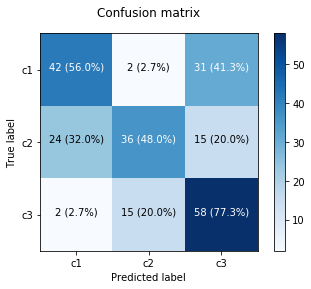

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        75
           1       0.68      0.48      0.56        75
           2       0.56      0.77      0.65        75

    accuracy                           0.60       225
   macro avg       0.62      0.60      0.60       225
weighted avg       0.62      0.60      0.60       225



In [173]:
# Metrics
plot_confusion_matrix(y_test, pred_test, classes=classes)
print (classification_report(y_test, pred_test))

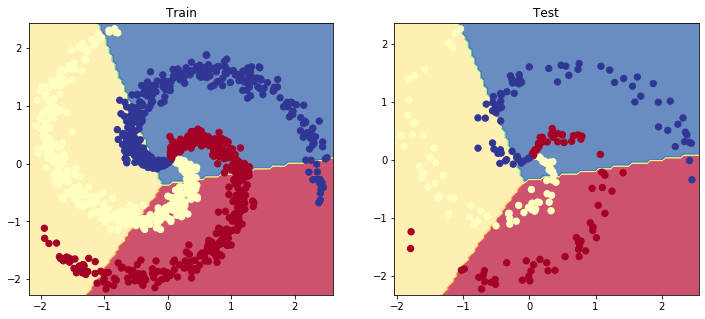

In [174]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=standardized_X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)
plt.show()

# Activation functions

Using the generalized linear method (logistic regression) yielded poor results because of the non-linearity present in our data. We need to use an activation function that can allow our model to learn and map the non-linearity in our data. There are many different options so let's explore a few.

In [175]:
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.activations import tanh

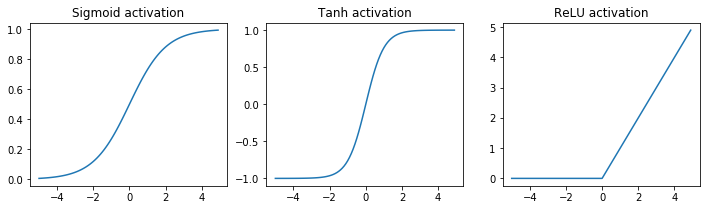

In [176]:
# Fig size
plt.figure(figsize=(12,3))

# Data
x = np.arange(-5., 5., 0.1)

# session = sess
# Sigmoid activation (constrain a value between 0 and 1.)
plt.subplot(1, 3, 1)
plt.title("Sigmoid activation")
y = sigmoid(x)
plt.plot(x, y)

# Tanh activation (constrain a value between -1 and 1.)
plt.subplot(1, 3, 2)
y = tanh(x)
plt.title("Tanh activation")
plt.plot(x, y)

# Relu (clip the negative values to 0)
plt.subplot(1, 3, 3)
y = relu(x)
plt.title("ReLU activation")
plt.plot(x, y)

# Show plots
plt.show()

The ReLU activation function ($max(0,z)$) is by far the most widely used activation function for neural networks. But as you can see, each activation function has it's own contraints so there are circumstances where you'll want to use different ones. For example, if we need to constrain our outputs between 0 and 1, then the sigmoid activation is the best choice.

<img height="45" src="http://bestanimations.com/HomeOffice/Lights/Bulbs/animated-light-bulb-gif-29.gif" align="left" vspace="20px" hspace="10px">

In some cases, using a ReLU activation function may not be sufficient. For instance, when the outputs from our neurons are mostly negative, the activation function will produce zeros. This effectively creates a "dying ReLU" and a recovery is unlikely. To mitigate this effect, we could lower the learning rate or use [alternative ReLU activations](https://medium.com/tinymind/a-practical-guide-to-relu-b83ca804f1f7), ex. leaky ReLU or parametric ReLU (PReLU), which have a small slope for negative neuron outputs. 

# From scratch

Now let's create our multilayer perceptron (MLP) which is going to be exactly like the logistic regression model but with the activation function to map the non-linearity in our data. Before we use TensorFlow 2.0 + Keras we will implement our neural network from scratch using NumPy so we can:
1. Absorb the fundamental concepts by implementing from scratch
2. Appreciate the level of abstraction TensorFlow provides

<div align="left">
<img src="https://raw.githubusercontent.com/practicalAI/images/master/images/lightbulb.gif" width="45px" align="left" hspace="10px">
</div> 

It's normal to find the math and code in this section slightly complex. You can still read each of the steps to build intuition for when we implement this using TensorFlow + Keras.


In [177]:
print (f"X: {standardized_X_train.shape}")
print (f"y: {y_train.shape}")

X: (1083, 2)
y: (1083,)


Our goal is to learn a model  𝑦̂   that models  𝑦  given  𝑋 . You'll notice that neural networks are just extensions of the generalized linear methods we've seen so far but with non-linear activation functions since our data will be highly non-linear.

$z_1 = XW_1$

$a_1 = f(z_1)$

$z_2 = a_1W_2$

$\hat{y} = softmax(z_2)$ # classification

* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W_1$ = 1st layer weights | $\in \mathbb{R}^{DXH}$ ($H$ is the number of hidden units in layer 1)
* $z_1$ = outputs from first layer  $\in \mathbb{R}^{NXH}$
* $f$ = non-linear activation function
* $a_1$ = activation applied first layer's outputs | $\in \mathbb{R}^{NXH}$
* $W_2$ = 2nd layer weights | $\in \mathbb{R}^{HXC}$ ($C$ is the number of classes)
* $z_2$ = outputs from second layer  $\in \mathbb{R}^{NXH}$
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NXC}$ ($N$ is the number of samples)

1. Randomly initialize the model's weights $W$ (we'll cover more effective initalization strategies later in this lesson).

In [178]:
# Initialize first layer's weights
W1 = 0.01 * np.random.randn(INPUT_DIM, HIDDEN_DIM)
b1 = np.zeros((1, HIDDEN_DIM))
print (f"W1: {W1.shape}")
print (f"b1: {b1.shape}")

W1: (2, 302)
b1: (1, 302)


In [179]:
HIDDEN_DIM

302

2. Feed inputs $X$ into the model to do the forward pass and receive the probabilities.

First we pass the inputs into the first layer.
  * $z_1 = XW_1$

In [180]:
# z1 = [NX2] · [2X100] + [1X100] = [NX100]
z1 = np.dot(standardized_X_train, W1) + b1
print (f"z1: {z1.shape}")

z1: (1083, 302)


Next we apply the non-linear activation function, ReLU ($max(0,z)$) in this case.
  * $a_1 = f(z_1)$

In [181]:
# Apply activation function
a1 = np.maximum(0, z1) # ReLU
print (f"a_1: {a1.shape}")

a_1: (1083, 302)


We pass the activations to the second layer to get our logits.
  * $z_2 = a_1W_2$

In [182]:
# Initialize second layer's weights
W2 = 0.01 * np.random.randn(HIDDEN_DIM, NUM_CLASSES)
b2 = np.zeros((1, NUM_CLASSES))
print (f"W2: {W2.shape}")
print (f"b2: {b2.shape}")

W2: (302, 3)
b2: (1, 3)


In [183]:
# z2 = logits = [NX100] · [100X3] + [1X3] = [NX3]
logits = np.dot(a1, W2) + b2
print (f"logits: {logits.shape}")
print (f"sample: {logits[0]}")

logits: (1083, 3)
sample: [-0.00082196  0.00288684  0.00162262]


We'll apply the softmax function to normalize the logits and btain class probabilities.
  * $\hat{y} = softmax(z_2)$

In [184]:
# Normalization via softmax to obtain class probabilities
exp_logits = np.exp(logits)
y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
print (f"y_hat: {y_hat.shape}")
print (f"sample: {y_hat[0]}")

y_hat: (1083, 3)
sample: [0.33264993 0.33388595 0.33346412]


3. Compare the predictions $\hat{y}$ (ex.  [0.3, 0.3, 0.4]]) with the actual target values $y$ (ex. class 2 would look like [0, 0, 1]) with the objective (cost) function to determine loss $J$. A common objective function for classification tasks is cross-entropy loss. 
  * $J(\theta) = - \sum_i ln(\hat{y_i}) = - \sum_i ln (\frac{e^{X_iW_y}}{\sum_j e^{X_iW}}) $

In [185]:
# Loss
correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
loss = np.sum(correct_class_logprobs) / len(y_train)

4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights. 
  
  The gradient of the loss w.r.t to W2 is the same as the gradients from logistic regression since $\hat{y} = softmax(z_2)$.
 * $\frac{\partial{J}}{\partial{W_{2j}}} = \frac{\partial{J}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{W_{2j}}} = - \frac{1}{\hat{y}}\frac{\partial{\hat{y}}}{\partial{W_{2j}}} = - \frac{1}{\frac{e^{W_{2y}a_1}}{\sum_j e^{a_1W}}}\frac{\sum_j e^{a_1W}e^{a_1W_{2y}}0 - e^{a_1W_{2y}}e^{a_1W_{2j}}a_1}{(\sum_j e^{a_1W})^2} = \frac{a_1e^{a_1W_{2j}}}{\sum_j e^{a_1W}} = a_1\hat{y}$
  * $\frac{\partial{J}}{\partial{W_{2y}}} = \frac{\partial{J}}{\partial{\hat{y}}}\frac{\partial{\hat{y}}}{\partial{W_{2y}}} = - \frac{1}{\hat{y}}\frac{\partial{\hat{y}}}{\partial{W_{2y}}} = - \frac{1}{\frac{e^{W_{2y}a_1}}{\sum_j e^{a_1W}}}\frac{\sum_j e^{a_1W}e^{a_1W_{2y}}a_1 - e^{a_1W_{2y}}e^{a_1W_{2y}}a_1}{(\sum_j e^{a_1W})^2} = \frac{1}{\hat{y}}(a_1\hat{y} - a_1\hat{y}^2) = a_1(\hat{y}-1)$

  The gradient of the loss w.r.t W1 is a bit trickier since we have to backpropagate through two sets of weights.
  * $ \frac{\partial{J}}{\partial{W_1}} = \frac{\partial{J}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{a_1}}  \frac{\partial{a_1}}{\partial{z_1}}  \frac{\partial{z_1}}{\partial{W_1}}  = W_2(\partial{scores})(\partial{ReLU})X $

In [186]:
# dJ/dW2
dscores = y_hat
dscores[range(len(y_hat)), y_train] -= 1
dscores /= len(y_train)
dW2 = np.dot(a1.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [187]:
# dJ/dW1
dhidden = np.dot(dscores, W2.T)
dhidden[a1 <= 0] = 0 # ReLu backprop
dW1 = np.dot(standardized_X_train.T, dhidden)
db1 = np.sum(dhidden, axis=0, keepdims=True)

5. Update the weights $W$ using a small learning rate $\alpha$. The updates will penalize the probabiltiy for the incorrect classes (j) and encourage a higher probability for the correct class (y).
  * $W_i = W_i - \alpha\frac{\partial{J}}{\partial{W_i}}$

In [188]:
# Update weights
W1 += -LEARNING_RATE * dW1
b1 += -LEARNING_RATE * db1
W2 += -LEARNING_RATE * dW2
b2 += -LEARNING_RATE * db2

6. Repeat steps 2 - 4 until model performs well.

In [189]:
# Initialize random weights
W1 = 0.01 * np.random.randn(INPUT_DIM, HIDDEN_DIM)
b1 = np.zeros((1, HIDDEN_DIM))
W2 = 0.01 * np.random.randn(HIDDEN_DIM, NUM_CLASSES)
b2 = np.zeros((1, NUM_CLASSES))

# Training loop
for epoch_num in range(1000):

    # First layer forward pass [NX2] · [2X100] = [NX100]
    z1 = np.dot(standardized_X_train, W1) + b1

    # Apply activation function
    a1 = np.maximum(0, z1) # ReLU

    # z2 = logits = [NX100] · [100X3] = [NX3]
    logits = np.dot(a1, W2) + b2
    
    # Normalization via softmax to obtain class probabilities
    exp_logits = np.exp(logits)
    y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

    # Loss
    correct_class_logprobs = -np.log(y_hat[range(len(y_hat)), y_train])
    loss = np.sum(correct_class_logprobs) / len(y_train)

    # show progress
    if epoch_num%100 == 0:
        # Accuracy
        y_pred = np.argmax(logits, axis=1)
        accuracy =  np.mean(np.equal(y_train, y_pred))
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}, accuracy: {accuracy:.3f}")

    # dJ/dW2
    dscores = y_hat
    dscores[range(len(y_hat)), y_train] -= 1
    dscores /= len(y_train)
    dW2 = np.dot(a1.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    # dJ/dW1
    dhidden = np.dot(dscores, W2.T)
    dhidden[a1 <= 0] = 0 # ReLu backprop
    dW1 = np.dot(standardized_X_train.T, dhidden)
    db1 = np.sum(dhidden, axis=0, keepdims=True)

    # Update weights
    W1 += -1e0 * dW1
    b1 += -1e0 * db1
    W2 += -1e0 * dW2
    b2 += -1e0 * db2

Epoch: 0, loss: 1.099, accuracy: 0.370
Epoch: 100, loss: 0.367, accuracy: 0.849
Epoch: 200, loss: 0.168, accuracy: 0.931
Epoch: 300, loss: 0.104, accuracy: 0.971
Epoch: 400, loss: 0.073, accuracy: 0.991
Epoch: 500, loss: 0.057, accuracy: 0.994
Epoch: 600, loss: 0.048, accuracy: 0.994
Epoch: 700, loss: 0.042, accuracy: 0.997
Epoch: 800, loss: 0.037, accuracy: 0.997
Epoch: 900, loss: 0.034, accuracy: 0.997


In [190]:
class MLPFromScratch():
    def predict(self, x):
        z1 = np.dot(x, W1) + b1
        a1 = np.maximum(0, z1)
        logits = np.dot(a1, W2) + b2
        exp_logits = np.exp(logits)
        y_hat = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
        return y_hat

In [191]:
# Evaluation
model = MLPFromScratch()
logits_train = model.predict(standardized_X_train)
pred_train = np.argmax(logits_train, axis=1)
logits_test = model.predict(standardized_X_test)
pred_test = np.argmax(logits_test, axis=1)

In [192]:
# Training and test accuracy
train_acc =  np.mean(np.equal(y_train, pred_train))
test_acc = np.mean(np.equal(y_test, pred_test))
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 1.00, test acc: 1.00


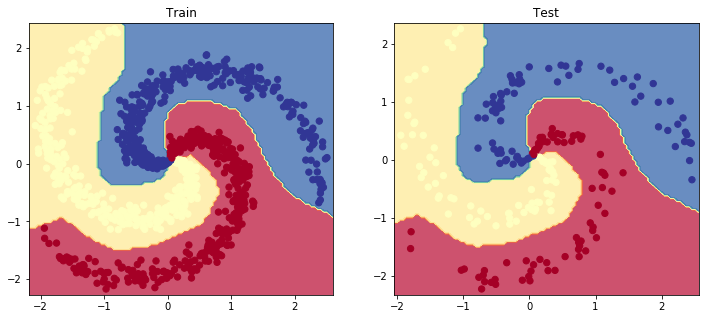

In [193]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=standardized_X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)
plt.show()

Credit for the plotting functions and the intuition behind all this is due to [CS231n](http://cs231n.github.io/neural-networks-case-study/), one of the best courses for machine learning. Now let's implement the MLP with TensorFlow + Keras.

# TensorFlow + Keras

### Components

In [194]:
# MLP
class MLP(Model):
    def __init__(self, hidden_dim, num_classes):
        super(MLP, self).__init__()
        self.fc1 = Dense(units=hidden_dim, activation='relu') # replaced linear with relu
        self.fc2 = Dense(units=num_classes, activation='softmax')
        
    def call(self, x_in, training=False):
        """Forward pass."""
        z = self.fc1(x_in)
        y_pred = self.fc2(z)
        return y_pred
    
    def sample(self, input_shape):
        x_in = Input(shape=input_shape)
        return Model(inputs=x_in, outputs=self.call(x_in)).summary()

### Operations

In [195]:
# Initialize the model
model = MLP(hidden_dim=HIDDEN_DIM,
            num_classes=NUM_CLASSES)
model.sample(input_shape=(INPUT_DIM,))

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_22 (Dense)             (None, 302)               906       
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 909       
Total params: 1,815
Trainable params: 1,815
Non-trainable params: 0
_________________________________________________________________


In [196]:
# Compile
optimizer = Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [197]:
# Training
model.fit(x=standardized_X_train, 
          y=y_train,
          validation_data=(standardized_X_val, y_val),
          epochs=NUM_EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight=class_weights,
          shuffle=False,
          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 1083 samples, validate on 192 samples
Epoch 1/500
1083/1083 [==============================] - 0s 455us/sample - loss: 0.0017 - accuracy: 0.7710 - val_loss: 3.2439e-04 - val_accuracy: 0.9688
Epoch 2/500
1083/1083 [==============================] - 0s 143us/sample - loss: 3.3881e-04 - accuracy: 0.9511 - val_loss: 1.9249e-04 - val_accuracy: 0.9688
Epoch 3/500
1083/1083 [==============================] - 0s 69us/sample - loss: 3.0993e-04 - accuracy: 0.9538 - val_loss: 1.6060e-04 - val_accuracy: 0.9948
Epoch 4/500
1083/1083 [==============================] - 0s 54us/sample - loss: 5.5205e-04 - accuracy: 0.9511 - val_loss: 1.4832e-04 - val_accuracy: 0.9792
Epoch 5/500
1083/1083 [==============================] - 0s 64us/sample - loss: 1.5511e-04 - accuracy: 0.9760 - val_loss: 1.5358e-04 - val_accuracy: 0.9948
Epoch 6/500
1083/1083 [==============================] - 0s 67us/sample - loss: 5.1261e-04 - accuracy: 0.9640 - val_loss: 2.1

Epoch 52/500
1083/1083 [==============================] - 0s 110us/sample - loss: 1.7428e-04 - accuracy: 0.9714 - val_loss: 1.0909e-04 - val_accuracy: 0.9844
Epoch 53/500
1083/1083 [==============================] - 0s 105us/sample - loss: 8.7409e-05 - accuracy: 0.9908 - val_loss: 9.2939e-05 - val_accuracy: 0.9844
Epoch 54/500
1083/1083 [==============================] - 0s 79us/sample - loss: 1.5158e-04 - accuracy: 0.9871 - val_loss: 8.1989e-05 - val_accuracy: 0.9948
Epoch 55/500
1083/1083 [==============================] - 0s 56us/sample - loss: 7.2272e-05 - accuracy: 0.9926 - val_loss: 7.2673e-05 - val_accuracy: 0.9948
Epoch 56/500
1083/1083 [==============================] - 0s 53us/sample - loss: 6.4322e-05 - accuracy: 0.9926 - val_loss: 6.8909e-05 - val_accuracy: 0.9948
Epoch 57/500
1083/1083 [==============================] - 0s 85us/sample - loss: 6.4257e-05 - accuracy: 0.9908 - val_loss: 6.7067e-05 - val_accuracy: 0.9896
Epoch 58/500
1083/1083 [==============================] 

1083/1083 [==============================] - 0s 60us/sample - loss: 3.5301e-05 - accuracy: 0.9954 - val_loss: 2.7900e-05 - val_accuracy: 0.9948
Epoch 105/500
1083/1083 [==============================] - 0s 58us/sample - loss: 3.5127e-05 - accuracy: 0.9954 - val_loss: 3.6726e-05 - val_accuracy: 0.9896
Epoch 106/500
1083/1083 [==============================] - 0s 54us/sample - loss: 3.4914e-05 - accuracy: 0.9954 - val_loss: 2.7191e-05 - val_accuracy: 0.9948
Epoch 107/500
1083/1083 [==============================] - 0s 54us/sample - loss: 3.4726e-05 - accuracy: 0.9954 - val_loss: 3.5889e-05 - val_accuracy: 0.9948
Epoch 108/500
1083/1083 [==============================] - 0s 51us/sample - loss: 3.4514e-05 - accuracy: 0.9954 - val_loss: 2.6776e-05 - val_accuracy: 0.9948
Epoch 109/500
1083/1083 [==============================] - 0s 52us/sample - loss: 3.4543e-05 - accuracy: 0.9954 - val_loss: 3.4919e-05 - val_accuracy: 0.9948
Epoch 110/500
1083/1083 [==============================] - 0s 51us

Epoch 156/500
1083/1083 [==============================] - 0s 62us/sample - loss: 3.8157e-05 - accuracy: 0.9945 - val_loss: 3.6225e-05 - val_accuracy: 0.9896
Epoch 157/500
1083/1083 [==============================] - 0s 58us/sample - loss: 3.8319e-05 - accuracy: 0.9935 - val_loss: 3.5367e-05 - val_accuracy: 0.9896
Epoch 158/500
1083/1083 [==============================] - 0s 54us/sample - loss: 3.7942e-05 - accuracy: 0.9945 - val_loss: 3.4588e-05 - val_accuracy: 0.9896
Epoch 159/500
1083/1083 [==============================] - 0s 57us/sample - loss: 3.7741e-05 - accuracy: 0.9945 - val_loss: 3.3835e-05 - val_accuracy: 0.9896
Epoch 160/500
1083/1083 [==============================] - 0s 62us/sample - loss: 3.7380e-05 - accuracy: 0.9954 - val_loss: 3.3294e-05 - val_accuracy: 0.9896
Epoch 161/500
1083/1083 [==============================] - 0s 67us/sample - loss: 3.6169e-05 - accuracy: 0.9954 - val_loss: 3.4933e-05 - val_accuracy: 0.9896
Epoch 162/500
1083/1083 [===========================

Epoch 208/500
1083/1083 [==============================] - 0s 55us/sample - loss: 3.1529e-05 - accuracy: 0.9954 - val_loss: 2.8950e-05 - val_accuracy: 0.9948
Epoch 209/500
1083/1083 [==============================] - 0s 55us/sample - loss: 3.3354e-05 - accuracy: 0.9954 - val_loss: 2.5366e-05 - val_accuracy: 1.0000
Epoch 210/500
1083/1083 [==============================] - 0s 57us/sample - loss: 3.3090e-05 - accuracy: 0.9954 - val_loss: 2.5917e-05 - val_accuracy: 1.0000
Epoch 211/500
1083/1083 [==============================] - 0s 63us/sample - loss: 3.0876e-05 - accuracy: 0.9954 - val_loss: 2.8843e-05 - val_accuracy: 1.0000
Epoch 212/500
1083/1083 [==============================] - 0s 65us/sample - loss: 3.0960e-05 - accuracy: 0.9954 - val_loss: 2.9647e-05 - val_accuracy: 1.0000
Epoch 213/500
1083/1083 [==============================] - 0s 58us/sample - loss: 3.1317e-05 - accuracy: 0.9954 - val_loss: 3.0280e-05 - val_accuracy: 0.9896
Epoch 214/500
1083/1083 [===========================

1083/1083 [==============================] - 0s 59us/sample - loss: 2.7156e-05 - accuracy: 0.9972 - val_loss: 2.3513e-05 - val_accuracy: 1.0000
Epoch 260/500
1083/1083 [==============================] - 0s 56us/sample - loss: 2.6888e-05 - accuracy: 0.9963 - val_loss: 2.4711e-05 - val_accuracy: 1.0000
Epoch 261/500
1083/1083 [==============================] - 0s 60us/sample - loss: 2.7112e-05 - accuracy: 0.9963 - val_loss: 2.5327e-05 - val_accuracy: 1.0000
Epoch 262/500
1083/1083 [==============================] - 0s 57us/sample - loss: 2.7189e-05 - accuracy: 0.9963 - val_loss: 2.5060e-05 - val_accuracy: 1.0000
Epoch 263/500
1083/1083 [==============================] - 0s 51us/sample - loss: 2.7386e-05 - accuracy: 0.9963 - val_loss: 2.4923e-05 - val_accuracy: 1.0000
Epoch 264/500
1083/1083 [==============================] - 0s 57us/sample - loss: 2.7268e-05 - accuracy: 0.9963 - val_loss: 2.5114e-05 - val_accuracy: 1.0000
Epoch 265/500
1083/1083 [==============================] - 0s 52us

Epoch 311/500
1083/1083 [==============================] - 0s 62us/sample - loss: 2.6055e-05 - accuracy: 0.9972 - val_loss: 2.6059e-05 - val_accuracy: 0.9948
Epoch 312/500
1083/1083 [==============================] - 0s 65us/sample - loss: 2.6611e-05 - accuracy: 0.9972 - val_loss: 2.5610e-05 - val_accuracy: 0.9948
Epoch 313/500
1083/1083 [==============================] - 0s 51us/sample - loss: 2.5917e-05 - accuracy: 0.9972 - val_loss: 2.5750e-05 - val_accuracy: 0.9948
Epoch 314/500
1083/1083 [==============================] - 0s 51us/sample - loss: 2.6466e-05 - accuracy: 0.9972 - val_loss: 2.5284e-05 - val_accuracy: 0.9948
Epoch 315/500
1083/1083 [==============================] - 0s 64us/sample - loss: 2.5791e-05 - accuracy: 0.9972 - val_loss: 2.5429e-05 - val_accuracy: 0.9948
Epoch 316/500
1083/1083 [==============================] - 0s 89us/sample - loss: 2.6333e-05 - accuracy: 0.9972 - val_loss: 2.4946e-05 - val_accuracy: 0.9948
Epoch 317/500
1083/1083 [===========================

Epoch 363/500
1083/1083 [==============================] - 0s 57us/sample - loss: 2.4440e-05 - accuracy: 0.9972 - val_loss: 1.7050e-05 - val_accuracy: 1.0000
Epoch 364/500
1083/1083 [==============================] - 0s 54us/sample - loss: 2.4431e-05 - accuracy: 0.9972 - val_loss: 1.6802e-05 - val_accuracy: 1.0000
Epoch 365/500
1083/1083 [==============================] - 0s 58us/sample - loss: 2.4566e-05 - accuracy: 0.9972 - val_loss: 1.6525e-05 - val_accuracy: 1.0000
Epoch 366/500
1083/1083 [==============================] - 0s 52us/sample - loss: 2.4226e-05 - accuracy: 0.9972 - val_loss: 1.6896e-05 - val_accuracy: 1.0000
Epoch 367/500
1083/1083 [==============================] - 0s 51us/sample - loss: 2.4390e-05 - accuracy: 0.9972 - val_loss: 1.6688e-05 - val_accuracy: 1.0000
Epoch 368/500
1083/1083 [==============================] - 0s 57us/sample - loss: 2.4390e-05 - accuracy: 0.9972 - val_loss: 1.6497e-05 - val_accuracy: 1.0000
Epoch 369/500
1083/1083 [===========================

Epoch 415/500
1083/1083 [==============================] - 0s 52us/sample - loss: 4.0716e-04 - accuracy: 0.9926 - val_loss: 7.2411e-05 - val_accuracy: 0.9896
Epoch 416/500
1083/1083 [==============================] - 0s 65us/sample - loss: 3.8865e-05 - accuracy: 0.9935 - val_loss: 5.8255e-05 - val_accuracy: 0.9896
Epoch 417/500
1083/1083 [==============================] - 0s 53us/sample - loss: 3.4577e-05 - accuracy: 0.9954 - val_loss: 4.2444e-05 - val_accuracy: 0.9896
Epoch 418/500
1083/1083 [==============================] - 0s 57us/sample - loss: 3.0961e-05 - accuracy: 0.9963 - val_loss: 4.5171e-05 - val_accuracy: 0.9896
Epoch 419/500
1083/1083 [==============================] - 0s 51us/sample - loss: 3.0796e-05 - accuracy: 0.9963 - val_loss: 4.6121e-05 - val_accuracy: 0.9896
Epoch 420/500
1083/1083 [==============================] - 0s 52us/sample - loss: 3.0661e-05 - accuracy: 0.9963 - val_loss: 4.6201e-05 - val_accuracy: 0.9896
Epoch 421/500
1083/1083 [===========================

1083/1083 [==============================] - 0s 55us/sample - loss: 2.5558e-05 - accuracy: 0.9963 - val_loss: 4.5341e-05 - val_accuracy: 0.9896
Epoch 467/500
1083/1083 [==============================] - 0s 53us/sample - loss: 2.4756e-05 - accuracy: 0.9963 - val_loss: 3.7588e-05 - val_accuracy: 0.9896
Epoch 468/500
1083/1083 [==============================] - 0s 51us/sample - loss: 3.1608e-05 - accuracy: 0.9954 - val_loss: 3.9808e-05 - val_accuracy: 0.9896
Epoch 469/500
1083/1083 [==============================] - 0s 56us/sample - loss: 2.4180e-05 - accuracy: 0.9963 - val_loss: 4.4074e-05 - val_accuracy: 0.9896
Epoch 470/500
1083/1083 [==============================] - 0s 57us/sample - loss: 2.5837e-05 - accuracy: 0.9963 - val_loss: 4.4961e-05 - val_accuracy: 0.9896
Epoch 471/500
1083/1083 [==============================] - 0s 62us/sample - loss: 2.5467e-05 - accuracy: 0.9963 - val_loss: 4.4772e-05 - val_accuracy: 0.9896
Epoch 472/500
1083/1083 [==============================] - 0s 61us

In [198]:
# Predictions
pred_train = model.predict(standardized_X_train) 
pred_test = model.predict(standardized_X_test)
print (f"sample probability: {pred_test[0]}")
pred_train = np.argmax(pred_train, axis=1)
pred_test = np.argmax(pred_test, axis=1)
print (f"sample class: {pred_test[0]}")

sample probability: [0. 1. 0.]
sample class: 1


In [199]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 1.00, test acc: 1.00


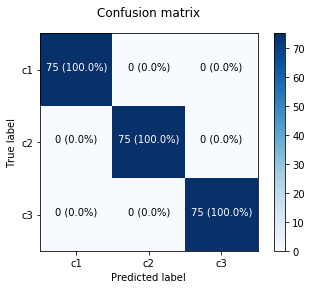

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



In [200]:
# Metrics
plot_confusion_matrix(y_test, pred_test, classes=classes)
print (classification_report(y_test, pred_test))

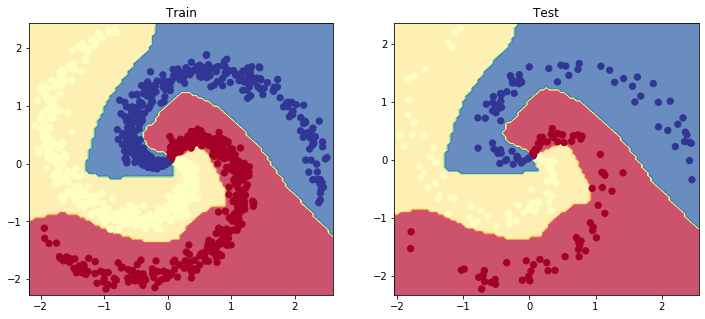

In [201]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=standardized_X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)
plt.show()

# Inference

In [202]:
# Inputs for inference
X_infer = pd.DataFrame([{'X1': 0.1, 'X2': 0.1}])
X_infer.head()

,X1,X2
0,0.1,0.1


In [203]:
# Standardize
standardized_X_infer = X_scaler.transform(X_infer)
print (standardized_X_infer)

[[0.3071182  0.31500591]]


In [204]:
# Predict
y_infer = model.predict(standardized_X_infer)
_class = np.argmax(y_infer)
print (f"The probability that you have a class {classes[_class]} is {y_infer[0][_class]*100.0:.0f}%")

The probability that you have a class c1 is 100%


# Initializing weights

So far we have been initializing weights with small random values and this isn't optimal for convergence during training. The objective is to have weights that are able to produce outputs that follow a similar distribution across all neurons. We can do this by enforcing weights to have unit variance prior the affine and non-linear operations.

<img height="45" src="http://bestanimations.com/HomeOffice/Lights/Bulbs/animated-light-bulb-gif-29.gif" align="left" vspace="20px" hspace="10px">

A popular method is to apply [xavier initialization](http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization), which essentially initializes the weights to allow the signal from the data to reach deep into the network. You may be wondering why we don't do this for every forward pass and that's a great question. We'll look at more advanced strategies that help with optimization like batch/layer normalization, etc. in future lessons. Meanwhile you can check out other initializers [here](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/initializers).

In [205]:
from tensorflow.keras.initializers import glorot_normal

In [206]:
# MLP
class MLP(Model):
    def __init__(self, hidden_dim, num_classes):
        super(MLP, self).__init__()
        xavier_initializer = glorot_normal() # xavier glorot initiailization
        self.fc1 = Dense(units=hidden_dim,
                         kernel_initializer=xavier_initializer,
                         activation='relu')
        self.fc2 = Dense(units=num_classes, 
                         activation='softmax')
        
    def call(self, x_in, training=False):
        """Forward pass."""
        z = self.fc1(x_in)
        y_pred = self.fc2(z)
        return y_pred
    
    def sample(self, input_shape):
        x_in = Input(shape=input_shape)
        return Model(inputs=x_in, outputs=self.call(x_in)).summary()

In [207]:
# Initialize the model
model = MLP(hidden_dim=HIDDEN_DIM,
            num_classes=NUM_CLASSES)
model.sample(input_shape=(INPUT_DIM,))

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_24 (Dense)             (None, 302)               906       
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 909       
Total params: 1,815
Trainable params: 1,815
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Compile
optimizer = Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [209]:
# Training
model.fit(x=standardized_X_train, 
          y=y_train,
          validation_data=(standardized_X_val, y_val),
          epochs=NUM_EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight=class_weights,
          shuffle=False,
          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 1083 samples, validate on 192 samples
Epoch 1/500
1083/1083 [==============================] - 1s 542us/sample - loss: 0.0017 - accuracy: 0.7572 - val_loss: 5.9370e-04 - val_accuracy: 0.8854
Epoch 2/500
1083/1083 [==============================] - 0s 109us/sample - loss: 4.6566e-04 - accuracy: 0.9317 - val_loss: 3.1734e-04 - val_accuracy: 0.9583
Epoch 3/500
1083/1083 [==============================] - 0s 73us/sample - loss: 7.3023e-04 - accuracy: 0.9344 - val_loss: 3.9803e-04 - val_accuracy: 0.9323
Epoch 4/500
1083/1083 [==============================] - 0s 77us/sample - loss: 2.9265e-04 - accuracy: 0.9695 - val_loss: 1.4021e-04 - val_accuracy: 0.9896
Epoch 5/500
1083/1083 [==============================] - 0s 150us/sample - loss: 1.3956e-04 - accuracy: 0.9788 - val_loss: 1.1546e-04 - val_accuracy: 0.9948
Epoch 6/500
1083/1083 [==============================] - 0s 85us/sample - loss: 8.7612e-05 - accuracy: 0.9898 - val_loss: 8.

Epoch 52/500
1083/1083 [==============================] - 0s 64us/sample - loss: 4.5790e-05 - accuracy: 0.9945 - val_loss: 6.0157e-05 - val_accuracy: 0.9896
Epoch 53/500
1083/1083 [==============================] - 0s 86us/sample - loss: 4.7123e-05 - accuracy: 0.9945 - val_loss: 6.4435e-05 - val_accuracy: 0.9896
Epoch 54/500
1083/1083 [==============================] - 0s 96us/sample - loss: 4.8351e-05 - accuracy: 0.9945 - val_loss: 6.9243e-05 - val_accuracy: 0.9896
Epoch 55/500
1083/1083 [==============================] - 0s 53us/sample - loss: 5.0305e-05 - accuracy: 0.9917 - val_loss: 7.6738e-05 - val_accuracy: 0.9896
Epoch 56/500
1083/1083 [==============================] - 0s 51us/sample - loss: 5.2578e-05 - accuracy: 0.9917 - val_loss: 8.1383e-05 - val_accuracy: 0.9896
Epoch 57/500
1083/1083 [==============================] - 0s 56us/sample - loss: 5.2968e-05 - accuracy: 0.9926 - val_loss: 8.7883e-05 - val_accuracy: 0.9896
Epoch 58/500
1083/1083 [==============================] - 

1083/1083 [==============================] - 0s 51us/sample - loss: 3.1798e-05 - accuracy: 0.9954 - val_loss: 2.7547e-05 - val_accuracy: 0.9948
Epoch 105/500
1083/1083 [==============================] - 0s 56us/sample - loss: 3.2225e-05 - accuracy: 0.9963 - val_loss: 2.3429e-05 - val_accuracy: 0.9948
Epoch 106/500
1083/1083 [==============================] - 0s 55us/sample - loss: 3.1936e-05 - accuracy: 0.9963 - val_loss: 2.3330e-05 - val_accuracy: 0.9948
Epoch 107/500
1083/1083 [==============================] - 0s 71us/sample - loss: 3.2227e-05 - accuracy: 0.9963 - val_loss: 2.8453e-05 - val_accuracy: 0.9948
Epoch 108/500
1083/1083 [==============================] - 0s 80us/sample - loss: 3.1791e-05 - accuracy: 0.9972 - val_loss: 2.2815e-05 - val_accuracy: 0.9948
Epoch 109/500
1083/1083 [==============================] - 0s 72us/sample - loss: 3.2217e-05 - accuracy: 0.9963 - val_loss: 3.6597e-05 - val_accuracy: 0.9896
Epoch 110/500
1083/1083 [==============================] - 0s 53us

Epoch 156/500
1083/1083 [==============================] - 0s 70us/sample - loss: 3.5133e-05 - accuracy: 0.9963 - val_loss: 2.7055e-05 - val_accuracy: 0.9948
Epoch 157/500
1083/1083 [==============================] - 0s 77us/sample - loss: 3.4945e-05 - accuracy: 0.9963 - val_loss: 2.6734e-05 - val_accuracy: 0.9948
Epoch 158/500
1083/1083 [==============================] - 0s 112us/sample - loss: 3.4767e-05 - accuracy: 0.9963 - val_loss: 2.6439e-05 - val_accuracy: 0.9948
Epoch 159/500
1083/1083 [==============================] - 0s 102us/sample - loss: 3.4590e-05 - accuracy: 0.9963 - val_loss: 2.6216e-05 - val_accuracy: 0.9948
Epoch 160/500
1083/1083 [==============================] - 0s 93us/sample - loss: 3.4438e-05 - accuracy: 0.9963 - val_loss: 2.5910e-05 - val_accuracy: 0.9948
Epoch 161/500
1083/1083 [==============================] - 0s 64us/sample - loss: 3.4269e-05 - accuracy: 0.9963 - val_loss: 2.5623e-05 - val_accuracy: 0.9948
Epoch 162/500
1083/1083 [=========================

Epoch 208/500
1083/1083 [==============================] - 0s 87us/sample - loss: 3.3106e-05 - accuracy: 0.9945 - val_loss: 2.4950e-05 - val_accuracy: 0.9948
Epoch 209/500
1083/1083 [==============================] - 0s 56us/sample - loss: 3.4120e-05 - accuracy: 0.9945 - val_loss: 2.7533e-05 - val_accuracy: 0.9948
Epoch 210/500
1083/1083 [==============================] - 0s 75us/sample - loss: 3.5281e-05 - accuracy: 0.9945 - val_loss: 3.1172e-05 - val_accuracy: 0.9948
Epoch 211/500
1083/1083 [==============================] - 0s 57us/sample - loss: 3.5037e-05 - accuracy: 0.9945 - val_loss: 3.2370e-05 - val_accuracy: 0.9948
Epoch 212/500
1083/1083 [==============================] - 0s 68us/sample - loss: 3.7750e-05 - accuracy: 0.9935 - val_loss: 6.0452e-05 - val_accuracy: 0.9896
Epoch 213/500
1083/1083 [==============================] - 0s 64us/sample - loss: 3.2354e-05 - accuracy: 0.9954 - val_loss: 4.2268e-05 - val_accuracy: 0.9896
Epoch 214/500
1083/1083 [===========================

Epoch 260/500
1083/1083 [==============================] - 0s 67us/sample - loss: 3.3028e-05 - accuracy: 0.9954 - val_loss: 4.3662e-05 - val_accuracy: 0.9896
Epoch 261/500
1083/1083 [==============================] - 0s 69us/sample - loss: 3.2653e-05 - accuracy: 0.9954 - val_loss: 4.2531e-05 - val_accuracy: 0.9896
Epoch 262/500
1083/1083 [==============================] - 0s 77us/sample - loss: 3.2406e-05 - accuracy: 0.9954 - val_loss: 4.4081e-05 - val_accuracy: 0.9896
Epoch 263/500
1083/1083 [==============================] - 0s 69us/sample - loss: 3.2850e-05 - accuracy: 0.9954 - val_loss: 4.0882e-05 - val_accuracy: 0.9896
Epoch 264/500
1083/1083 [==============================] - 0s 71us/sample - loss: 3.1736e-05 - accuracy: 0.9945 - val_loss: 3.9463e-05 - val_accuracy: 0.9896
Epoch 265/500
1083/1083 [==============================] - 0s 93us/sample - loss: 3.6731e-05 - accuracy: 0.9945 - val_loss: 6.3860e-05 - val_accuracy: 0.9896
Epoch 266/500
1083/1083 [===========================

Epoch 312/500
1083/1083 [==============================] - 0s 75us/sample - loss: 3.0741e-05 - accuracy: 0.9954 - val_loss: 2.0928e-05 - val_accuracy: 1.0000
Epoch 313/500
1083/1083 [==============================] - 0s 87us/sample - loss: 3.7225e-05 - accuracy: 0.9954 - val_loss: 1.8028e-05 - val_accuracy: 1.0000
Epoch 314/500
1083/1083 [==============================] - 0s 69us/sample - loss: 3.6406e-05 - accuracy: 0.9954 - val_loss: 1.8311e-05 - val_accuracy: 1.0000
Epoch 315/500
1083/1083 [==============================] - 0s 69us/sample - loss: 3.4942e-05 - accuracy: 0.9954 - val_loss: 1.9165e-05 - val_accuracy: 1.0000
Epoch 316/500
1083/1083 [==============================] - 0s 55us/sample - loss: 3.4091e-05 - accuracy: 0.9954 - val_loss: 1.9767e-05 - val_accuracy: 1.0000
Epoch 317/500
1083/1083 [==============================] - 0s 53us/sample - loss: 3.3466e-05 - accuracy: 0.9954 - val_loss: 2.0214e-05 - val_accuracy: 1.0000
Epoch 318/500
1083/1083 [===========================

Epoch 364/500
1083/1083 [==============================] - 0s 62us/sample - loss: 2.9191e-05 - accuracy: 0.9963 - val_loss: 4.0041e-05 - val_accuracy: 0.9896
Epoch 365/500
1083/1083 [==============================] - 0s 70us/sample - loss: 2.9459e-05 - accuracy: 0.9963 - val_loss: 4.1812e-05 - val_accuracy: 0.9896
Epoch 366/500
1083/1083 [==============================] - 0s 72us/sample - loss: 2.9766e-05 - accuracy: 0.9963 - val_loss: 4.9365e-05 - val_accuracy: 0.9896
Epoch 367/500
1083/1083 [==============================] - 0s 64us/sample - loss: 3.1019e-05 - accuracy: 0.9963 - val_loss: 4.7462e-05 - val_accuracy: 0.9896
Epoch 368/500
1083/1083 [==============================] - 0s 58us/sample - loss: 3.3243e-05 - accuracy: 0.9954 - val_loss: 7.2058e-05 - val_accuracy: 0.9896
Epoch 369/500
1083/1083 [==============================] - 0s 65us/sample - loss: 3.8376e-05 - accuracy: 0.9945 - val_loss: 8.1807e-05 - val_accuracy: 0.9896
Epoch 370/500
1083/1083 [===========================

Epoch 416/500
1083/1083 [==============================] - 0s 67us/sample - loss: 2.4649e-05 - accuracy: 0.9963 - val_loss: 2.8876e-05 - val_accuracy: 0.9896
Epoch 417/500
1083/1083 [==============================] - 0s 60us/sample - loss: 2.4532e-05 - accuracy: 0.9963 - val_loss: 2.8078e-05 - val_accuracy: 0.9896
Epoch 418/500
1083/1083 [==============================] - 0s 66us/sample - loss: 2.4423e-05 - accuracy: 0.9972 - val_loss: 2.7313e-05 - val_accuracy: 0.9896
Epoch 419/500
1083/1083 [==============================] - 0s 54us/sample - loss: 2.4320e-05 - accuracy: 0.9972 - val_loss: 2.6582e-05 - val_accuracy: 0.9896
Epoch 420/500
1083/1083 [==============================] - 0s 67us/sample - loss: 2.4224e-05 - accuracy: 0.9972 - val_loss: 2.5882e-05 - val_accuracy: 0.9948
Epoch 421/500
1083/1083 [==============================] - 0s 54us/sample - loss: 2.4134e-05 - accuracy: 0.9972 - val_loss: 2.5211e-05 - val_accuracy: 0.9948
Epoch 422/500
1083/1083 [===========================

Epoch 468/500
1083/1083 [==============================] - 0s 98us/sample - loss: 2.2930e-05 - accuracy: 0.9972 - val_loss: 1.2129e-05 - val_accuracy: 1.0000
Epoch 469/500
1083/1083 [==============================] - 0s 66us/sample - loss: 2.3015e-05 - accuracy: 0.9972 - val_loss: 1.2513e-05 - val_accuracy: 1.0000
Epoch 470/500
1083/1083 [==============================] - 0s 80us/sample - loss: 2.2527e-05 - accuracy: 0.9972 - val_loss: 1.2717e-05 - val_accuracy: 1.0000
Epoch 471/500
1083/1083 [==============================] - 0s 74us/sample - loss: 2.2822e-05 - accuracy: 0.9972 - val_loss: 1.2641e-05 - val_accuracy: 1.0000
Epoch 472/500
1083/1083 [==============================] - 0s 55us/sample - loss: 2.2917e-05 - accuracy: 0.9972 - val_loss: 1.1843e-05 - val_accuracy: 1.0000
Epoch 473/500
1083/1083 [==============================] - 0s 68us/sample - loss: 2.2777e-05 - accuracy: 0.9972 - val_loss: 1.2897e-05 - val_accuracy: 1.0000
Epoch 474/500
1083/1083 [===========================

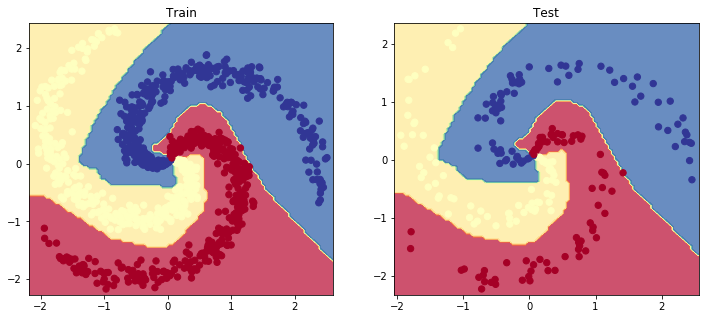

In [210]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=standardized_X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)
plt.show()

# Dropout

A great technique to overcome overfitting is to increase the size of your data but this isn't always an option. Fortuntely, there are methods like regularization and dropout that can help create a more robust model. 

Dropout is a technique (used only during training) that allows us to zero the outputs of neurons. We do this for `dropout_p`% of the total neurons in each layer and it changes every batch. Dropout prevents units from co-adapting too much to the data and acts as a sampling strategy since we drop a different set of neurons each time.

<img src="https://raw.githubusercontent.com/practicalAI/images/master/basic_ml/06_Multilayer_Perceptron/dropout.png" width="350">

* [Dropout: A Simple Way to Prevent Neural Networks from
Overfitting](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

In [211]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

### Components

In [222]:
# MLP
class MLP(Model):
    def __init__(self, hidden_dim, lambda_l2, dropout_p, num_classes):
        super(MLP, self).__init__()
        self.fc1 = Dense(units=hidden_dim,
                         kernel_regularizer=l2(lambda_l2), # adding L2 regularization
                         activation='relu')
        self.dropout = Dropout(rate=dropout_p)
        self.fc2 = Dense(units=num_classes, 
                         activation='softmax')
        
    def call(self, x_in, training=False):
        """Forward pass."""
        z = self.fc1(x_in)
        if training:
            z = self.dropout(z, training=training) # adding dropout
        y_pred = self.fc2(z)
        return y_pred
    
    def sample(self, input_shape):
        x_in = Input(shape=input_shape)
        return Model(inputs=x_in, outputs=self.call(x_in)).summary()

### Operations

In [223]:
# Arguments
DROPOUT_P = 0.1 # % of the neurons that are dropped each pass
LAMBDA_L2 = 1e-4 # L2 regularization

In [224]:
# Initialize the model
model = MLP(hidden_dim=HIDDEN_DIM,
            lambda_l2=LAMBDA_L2,
            dropout_p=DROPOUT_P,
            num_classes=NUM_CLASSES)
model.sample(input_shape=(INPUT_DIM,))

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_32 (Dense)             (None, 302)               906       
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 909       
Total params: 1,815
Trainable params: 1,815
Non-trainable params: 0
_________________________________________________________________


In [226]:
# Compile
optimizer = Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


# Training
model.fit(x=standardized_X_train, 
          y=y_train,
          validation_data=(standardized_X_val, y_val),
          epochs=NUM_EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight=class_weights,
          shuffle=False,
          verbose=1)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 1083 samples, validate on 192 samples
Epoch 1/500
1083/1083 [==============================] - 1s 747us/sample - loss: 0.0028 - accuracy: 0.6547 - val_loss: 0.0019 - val_accuracy: 0.8021
Epoch 2/500
1083/1083 [==============================] - 0s 95us/sample - loss: 0.0018 - accuracy: 0.8052 - val_loss: 0.0016 - val_accuracy: 0.8281
Epoch 3/500
1083/1083 [==============================] - 0s 88us/sample - loss: 0.0016 - accuracy: 0.8541 - val_loss: 0.0016 - val_accuracy: 0.8229
Epoch 4/500
1083/1083 [==============================] - 0s 137us/sample - loss: 0.0016 - accuracy: 0.8430 - val_loss: 0.0012 - val_accuracy: 0.9531
Epoch 5/500
1083/1083 [==============================] - 0s 108us/sample - loss: 0.0015 - accuracy: 0.8652 - val_loss: 0.0015 - val_accuracy: 0.8490
Epoch 6/500
1083/1083 [==============================] - 0s 136us/sample - loss: 0.0016 - accuracy: 0.8366 - val_loss: 0.0014 - val_accuracy: 0.8854
Epoch 7/500

1083/1083 [==============================] - 0s 106us/sample - loss: 0.0019 - accuracy: 0.7064 - val_loss: 0.0018 - val_accuracy: 0.6979
Epoch 55/500
1083/1083 [==============================] - 0s 140us/sample - loss: 0.0021 - accuracy: 0.6971 - val_loss: 0.0019 - val_accuracy: 0.8333
Epoch 56/500
1083/1083 [==============================] - 0s 103us/sample - loss: 0.0021 - accuracy: 0.7138 - val_loss: 0.0018 - val_accuracy: 0.7396
Epoch 57/500
1083/1083 [==============================] - 0s 114us/sample - loss: 0.0019 - accuracy: 0.7452 - val_loss: 0.0017 - val_accuracy: 0.7396
Epoch 58/500
1083/1083 [==============================] - 0s 79us/sample - loss: 0.0019 - accuracy: 0.7433 - val_loss: 0.0017 - val_accuracy: 0.7500
Epoch 59/500
1083/1083 [==============================] - 0s 93us/sample - loss: 0.0020 - accuracy: 0.7036 - val_loss: 0.0018 - val_accuracy: 0.7760
Epoch 60/500
1083/1083 [==============================] - 0s 112us/sample - loss: 0.0018 - accuracy: 0.7572 - val_l

Epoch 109/500
1083/1083 [==============================] - 0s 75us/sample - loss: 0.0019 - accuracy: 0.7590 - val_loss: 0.0018 - val_accuracy: 0.6823
Epoch 110/500
1083/1083 [==============================] - 0s 76us/sample - loss: 0.0023 - accuracy: 0.6870 - val_loss: 0.0020 - val_accuracy: 0.7083
Epoch 111/500
1083/1083 [==============================] - 0s 71us/sample - loss: 0.0019 - accuracy: 0.7387 - val_loss: 0.0014 - val_accuracy: 0.8542
Epoch 112/500
1083/1083 [==============================] - 0s 82us/sample - loss: 0.0018 - accuracy: 0.7608 - val_loss: 0.0015 - val_accuracy: 0.7969
Epoch 113/500
1083/1083 [==============================] - 0s 63us/sample - loss: 0.0017 - accuracy: 0.7655 - val_loss: 0.0014 - val_accuracy: 0.8281
Epoch 114/500
1083/1083 [==============================] - 0s 78us/sample - loss: 0.0018 - accuracy: 0.7378 - val_loss: 0.0016 - val_accuracy: 0.7969
Epoch 115/500
1083/1083 [==============================] - 0s 67us/sample - loss: 0.0019 - accuracy:

1083/1083 [==============================] - 0s 82us/sample - loss: 0.0021 - accuracy: 0.6805 - val_loss: 0.0018 - val_accuracy: 0.7240
Epoch 164/500
1083/1083 [==============================] - 0s 73us/sample - loss: 0.0022 - accuracy: 0.6473 - val_loss: 0.0017 - val_accuracy: 0.7188
Epoch 165/500
1083/1083 [==============================] - 0s 75us/sample - loss: 0.0021 - accuracy: 0.6454 - val_loss: 0.0017 - val_accuracy: 0.7135
Epoch 166/500
1083/1083 [==============================] - 0s 65us/sample - loss: 0.0021 - accuracy: 0.6399 - val_loss: 0.0020 - val_accuracy: 0.6562
Epoch 167/500
1083/1083 [==============================] - 0s 62us/sample - loss: 0.0021 - accuracy: 0.6473 - val_loss: 0.0018 - val_accuracy: 0.6875
Epoch 168/500
1083/1083 [==============================] - 0s 64us/sample - loss: 0.0021 - accuracy: 0.6787 - val_loss: 0.0018 - val_accuracy: 0.6823
Epoch 169/500
1083/1083 [==============================] - 0s 80us/sample - loss: 0.0021 - accuracy: 0.6676 - val_

Epoch 218/500
1083/1083 [==============================] - 0s 68us/sample - loss: 0.0020 - accuracy: 0.6879 - val_loss: 0.0018 - val_accuracy: 0.6927
Epoch 219/500
1083/1083 [==============================] - 0s 67us/sample - loss: 0.0020 - accuracy: 0.6787 - val_loss: 0.0017 - val_accuracy: 0.7240
Epoch 220/500
1083/1083 [==============================] - 0s 64us/sample - loss: 0.0021 - accuracy: 0.6427 - val_loss: 0.0017 - val_accuracy: 0.7188
Epoch 221/500
1083/1083 [==============================] - 0s 63us/sample - loss: 0.0020 - accuracy: 0.6750 - val_loss: 0.0016 - val_accuracy: 0.7240
Epoch 222/500
1083/1083 [==============================] - 0s 78us/sample - loss: 0.0020 - accuracy: 0.6962 - val_loss: 0.0017 - val_accuracy: 0.7188
Epoch 223/500
1083/1083 [==============================] - 0s 61us/sample - loss: 0.0021 - accuracy: 0.6713 - val_loss: 0.0017 - val_accuracy: 0.7135
Epoch 224/500
1083/1083 [==============================] - 0s 65us/sample - loss: 0.0021 - accuracy:

1083/1083 [==============================] - 0s 84us/sample - loss: 0.0022 - accuracy: 0.6316 - val_loss: 0.0018 - val_accuracy: 0.7188
Epoch 273/500
1083/1083 [==============================] - 0s 75us/sample - loss: 0.0021 - accuracy: 0.6667 - val_loss: 0.0019 - val_accuracy: 0.6823
Epoch 274/500
1083/1083 [==============================] - 0s 82us/sample - loss: 0.0021 - accuracy: 0.6584 - val_loss: 0.0019 - val_accuracy: 0.6823
Epoch 275/500
1083/1083 [==============================] - 0s 64us/sample - loss: 0.0020 - accuracy: 0.6657 - val_loss: 0.0018 - val_accuracy: 0.7031
Epoch 276/500
1083/1083 [==============================] - 0s 89us/sample - loss: 0.0021 - accuracy: 0.6537 - val_loss: 0.0018 - val_accuracy: 0.7031
Epoch 277/500
1083/1083 [==============================] - 0s 73us/sample - loss: 0.0020 - accuracy: 0.6565 - val_loss: 0.0018 - val_accuracy: 0.7031
Epoch 278/500
1083/1083 [==============================] - 0s 94us/sample - loss: 0.0020 - accuracy: 0.6713 - val_

Epoch 327/500
1083/1083 [==============================] - 0s 75us/sample - loss: 0.0022 - accuracy: 0.6731 - val_loss: 0.0018 - val_accuracy: 0.7135
Epoch 328/500
1083/1083 [==============================] - 0s 77us/sample - loss: 0.0022 - accuracy: 0.6584 - val_loss: 0.0019 - val_accuracy: 0.6510
Epoch 329/500
1083/1083 [==============================] - 0s 92us/sample - loss: 0.0022 - accuracy: 0.6565 - val_loss: 0.0017 - val_accuracy: 0.7240
Epoch 330/500
1083/1083 [==============================] - 0s 70us/sample - loss: 0.0020 - accuracy: 0.6731 - val_loss: 0.0018 - val_accuracy: 0.7031
Epoch 331/500
1083/1083 [==============================] - 0s 85us/sample - loss: 0.0021 - accuracy: 0.6491 - val_loss: 0.0018 - val_accuracy: 0.7031
Epoch 332/500
1083/1083 [==============================] - 0s 96us/sample - loss: 0.0020 - accuracy: 0.6676 - val_loss: 0.0019 - val_accuracy: 0.6719
Epoch 333/500
1083/1083 [==============================] - 0s 56us/sample - loss: 0.0021 - accuracy:

1083/1083 [==============================] - 0s 87us/sample - loss: 0.0024 - accuracy: 0.6076 - val_loss: 0.0022 - val_accuracy: 0.6510
Epoch 382/500
1083/1083 [==============================] - 0s 91us/sample - loss: 0.0024 - accuracy: 0.6288 - val_loss: 0.0021 - val_accuracy: 0.6823
Epoch 383/500
1083/1083 [==============================] - 0s 91us/sample - loss: 0.0021 - accuracy: 0.6750 - val_loss: 0.0018 - val_accuracy: 0.7083
Epoch 384/500
1083/1083 [==============================] - 0s 79us/sample - loss: 0.0020 - accuracy: 0.6648 - val_loss: 0.0017 - val_accuracy: 0.7188
Epoch 385/500
1083/1083 [==============================] - 0s 69us/sample - loss: 0.0022 - accuracy: 0.6380 - val_loss: 0.0019 - val_accuracy: 0.6771
Epoch 386/500
1083/1083 [==============================] - 0s 67us/sample - loss: 0.0020 - accuracy: 0.6805 - val_loss: 0.0018 - val_accuracy: 0.6406
Epoch 387/500
1083/1083 [==============================] - 0s 87us/sample - loss: 0.0021 - accuracy: 0.6602 - val_

Epoch 436/500
1083/1083 [==============================] - 0s 57us/sample - loss: 0.0022 - accuracy: 0.6482 - val_loss: 0.0019 - val_accuracy: 0.6562
Epoch 437/500
1083/1083 [==============================] - 0s 65us/sample - loss: 0.0021 - accuracy: 0.6639 - val_loss: 0.0018 - val_accuracy: 0.7031
Epoch 438/500
1083/1083 [==============================] - 0s 65us/sample - loss: 0.0021 - accuracy: 0.6777 - val_loss: 0.0018 - val_accuracy: 0.6927
Epoch 439/500
1083/1083 [==============================] - 0s 64us/sample - loss: 0.0021 - accuracy: 0.6380 - val_loss: 0.0018 - val_accuracy: 0.7240
Epoch 440/500
1083/1083 [==============================] - 0s 63us/sample - loss: 0.0021 - accuracy: 0.6473 - val_loss: 0.0017 - val_accuracy: 0.7083
Epoch 441/500
1083/1083 [==============================] - 0s 64us/sample - loss: 0.0021 - accuracy: 0.6334 - val_loss: 0.0018 - val_accuracy: 0.6927
Epoch 442/500
1083/1083 [==============================] - 0s 59us/sample - loss: 0.0021 - accuracy:

1083/1083 [==============================] - 0s 69us/sample - loss: 0.0020 - accuracy: 0.6731 - val_loss: 0.0017 - val_accuracy: 0.7083
Epoch 491/500
1083/1083 [==============================] - 0s 58us/sample - loss: 0.0022 - accuracy: 0.6584 - val_loss: 0.0018 - val_accuracy: 0.7083
Epoch 492/500
1083/1083 [==============================] - 0s 76us/sample - loss: 0.0021 - accuracy: 0.6722 - val_loss: 0.0022 - val_accuracy: 0.6615
Epoch 493/500
1083/1083 [==============================] - 0s 69us/sample - loss: 0.0023 - accuracy: 0.6574 - val_loss: 0.0018 - val_accuracy: 0.7031
Epoch 494/500
1083/1083 [==============================] - 0s 59us/sample - loss: 0.0020 - accuracy: 0.6898 - val_loss: 0.0018 - val_accuracy: 0.7083
Epoch 495/500
1083/1083 [==============================] - 0s 56us/sample - loss: 0.0021 - accuracy: 0.6704 - val_loss: 0.0018 - val_accuracy: 0.7083
Epoch 496/500
1083/1083 [==============================] - 0s 56us/sample - loss: 0.0022 - accuracy: 0.6584 - val_

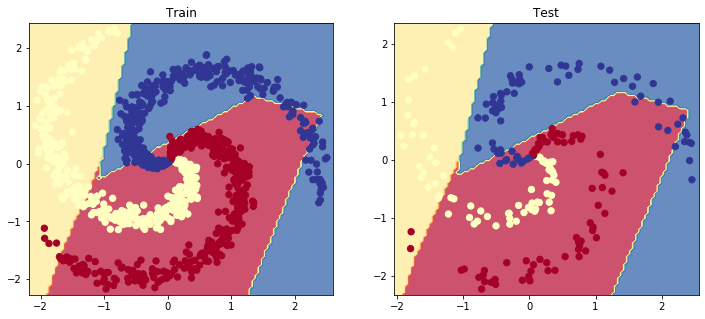

In [227]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=standardized_X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)
plt.show()

# Overfitting

Though neural networks are great at capturing non-linear relationships they are highly susceptible to overfitting to the training data and failing to generalize on test data. Just take a look at the example below where we generate completely random data and are able to fit a model with [$2*N*C + D$](https://arxiv.org/abs/1611.03530) hidden units. The training performance is good (~70%) but the overfitting leads to very poor test performance. We'll be covering strategies to tackle overfitting in future lessons.

In [128]:
# Arguments
NUM_EPOCHS = 500
NUM_SAMPLES_PER_CLASS = 50
LEARNING_RATE = 1e-1
HIDDEN_DIM = 2 * NUM_SAMPLES_PER_CLASS * NUM_CLASSES + INPUT_DIM # 2*N*C + D

In [129]:
# Generate random data
X = np.random.rand(NUM_SAMPLES_PER_CLASS * NUM_CLASSES, INPUT_DIM)
y = np.array([[i]*NUM_SAMPLES_PER_CLASS for i in range(NUM_CLASSES)]).reshape(-1)
print ("X: ", format(np.shape(X)))
print ("y: ", format(np.shape(y)))

X:  (150, 2)
y:  (150,)


In [130]:
# Create data splits
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(
    X, y, val_size=VAL_SIZE, test_size=TEST_SIZE, shuffle=SHUFFLE)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_val:", X_val.shape)
print ("y_val:", y_val.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (107, 2)
y_train: (107,)
X_val: (20, 2)
y_val: (20,)
X_test: (23, 2)
y_test: (23,)


In [131]:
# Standardize the inputs (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
# Apply scaler on training and test data (don't standardize outputs for classification)
standardized_X_train = X_scaler.transform(X_train)
standardized_X_val = X_scaler.transform(X_val)
standardized_X_test = X_scaler.transform(X_test)

In [132]:
# Initialize the model
model = MLP(hidden_dim=HIDDEN_DIM,
            lambda_l2=0.0,
            dropout_p=0.0,
            num_classes=NUM_CLASSES)
model.sample(input_shape=(INPUT_DIM,))

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_18 (Dense)             (None, 302)               906       
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 909       
Total params: 1,815
Trainable params: 1,815
Non-trainable params: 0
_________________________________________________________________


In [133]:
# Compile
optimizer = Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer,
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [134]:
# Training
model.fit(x=standardized_X_train, 
          y=y_train,
          validation_data=(standardized_X_val, y_val),
          epochs=NUM_EPOCHS,
          batch_size=BATCH_SIZE,
          class_weight=class_weights,
          shuffle=False,
          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 107 samples, validate on 20 samples
Epoch 1/500
107/107 [==============================] - 0s 5ms/sample - loss: 0.0042 - accuracy: 0.3645 - val_loss: 0.0038 - val_accuracy: 0.3500
Epoch 2/500
107/107 [==============================] - 0s 164us/sample - loss: 0.0038 - accuracy: 0.3084 - val_loss: 0.0033 - val_accuracy: 0.3500
Epoch 3/500
107/107 [==============================] - 0s 154us/sample - loss: 0.0031 - accuracy: 0.3364 - val_loss: 0.0031 - val_accuracy: 0.5000
Epoch 4/500
107/107 [==============================] - 0s 156us/sample - loss: 0.0032 - accuracy: 0.3832 - val_loss: 0.0032 - val_accuracy: 0.3500
Epoch 5/500
107/107 [==============================] - 0s 179us/sample - loss: 0.0030 - accuracy: 0.3738 - val_loss: 0.0032 - val_accuracy: 0.3500
Epoch 6/500
107/107 [==============================] - 0s 169us/sample - loss: 0.0030 - accuracy: 0.3645 - val_loss: 0.0033 - val_accuracy: 0.3500
Epoch 7/500
107/107 [====

107/107 [==============================] - 0s 177us/sample - loss: 0.0027 - accuracy: 0.4860 - val_loss: 0.0040 - val_accuracy: 0.3500
Epoch 56/500
107/107 [==============================] - 0s 133us/sample - loss: 0.0027 - accuracy: 0.4766 - val_loss: 0.0042 - val_accuracy: 0.3500
Epoch 57/500
107/107 [==============================] - 0s 140us/sample - loss: 0.0026 - accuracy: 0.5140 - val_loss: 0.0043 - val_accuracy: 0.3500
Epoch 58/500
107/107 [==============================] - 0s 141us/sample - loss: 0.0026 - accuracy: 0.5047 - val_loss: 0.0039 - val_accuracy: 0.4000
Epoch 59/500
107/107 [==============================] - 0s 151us/sample - loss: 0.0026 - accuracy: 0.5140 - val_loss: 0.0039 - val_accuracy: 0.3500
Epoch 60/500
107/107 [==============================] - 0s 179us/sample - loss: 0.0026 - accuracy: 0.5234 - val_loss: 0.0044 - val_accuracy: 0.3500
Epoch 61/500
107/107 [==============================] - 0s 162us/sample - loss: 0.0027 - accuracy: 0.5327 - val_loss: 0.0041 

107/107 [==============================] - 0s 244us/sample - loss: 0.0025 - accuracy: 0.4953 - val_loss: 0.0048 - val_accuracy: 0.3500
Epoch 111/500
107/107 [==============================] - 0s 152us/sample - loss: 0.0026 - accuracy: 0.5234 - val_loss: 0.0042 - val_accuracy: 0.4000
Epoch 112/500
107/107 [==============================] - 0s 157us/sample - loss: 0.0026 - accuracy: 0.5234 - val_loss: 0.0048 - val_accuracy: 0.3000
Epoch 113/500
107/107 [==============================] - 0s 156us/sample - loss: 0.0027 - accuracy: 0.5140 - val_loss: 0.0042 - val_accuracy: 0.4500
Epoch 114/500
107/107 [==============================] - 0s 147us/sample - loss: 0.0025 - accuracy: 0.5234 - val_loss: 0.0048 - val_accuracy: 0.3500
Epoch 115/500
107/107 [==============================] - 0s 207us/sample - loss: 0.0025 - accuracy: 0.5514 - val_loss: 0.0043 - val_accuracy: 0.3500
Epoch 116/500
107/107 [==============================] - 0s 185us/sample - loss: 0.0025 - accuracy: 0.5234 - val_loss: 0

Epoch 165/500
107/107 [==============================] - 0s 281us/sample - loss: 0.0024 - accuracy: 0.5421 - val_loss: 0.0047 - val_accuracy: 0.4000
Epoch 166/500
107/107 [==============================] - 0s 325us/sample - loss: 0.0025 - accuracy: 0.5607 - val_loss: 0.0050 - val_accuracy: 0.3000
Epoch 167/500
107/107 [==============================] - 0s 249us/sample - loss: 0.0025 - accuracy: 0.5514 - val_loss: 0.0044 - val_accuracy: 0.4500
Epoch 168/500
107/107 [==============================] - 0s 194us/sample - loss: 0.0025 - accuracy: 0.5888 - val_loss: 0.0046 - val_accuracy: 0.3500
Epoch 169/500
107/107 [==============================] - 0s 243us/sample - loss: 0.0025 - accuracy: 0.5701 - val_loss: 0.0055 - val_accuracy: 0.3500
Epoch 170/500
107/107 [==============================] - 0s 156us/sample - loss: 0.0026 - accuracy: 0.5234 - val_loss: 0.0043 - val_accuracy: 0.4000
Epoch 171/500
107/107 [==============================] - 0s 173us/sample - loss: 0.0025 - accuracy: 0.5514

Epoch 220/500
107/107 [==============================] - 0s 179us/sample - loss: 0.0023 - accuracy: 0.6449 - val_loss: 0.0052 - val_accuracy: 0.3500
Epoch 221/500
107/107 [==============================] - 0s 176us/sample - loss: 0.0024 - accuracy: 0.5981 - val_loss: 0.0051 - val_accuracy: 0.3500
Epoch 222/500
107/107 [==============================] - 0s 166us/sample - loss: 0.0023 - accuracy: 0.6168 - val_loss: 0.0046 - val_accuracy: 0.4500
Epoch 223/500
107/107 [==============================] - 0s 131us/sample - loss: 0.0023 - accuracy: 0.6168 - val_loss: 0.0052 - val_accuracy: 0.3500
Epoch 224/500
107/107 [==============================] - 0s 173us/sample - loss: 0.0023 - accuracy: 0.5888 - val_loss: 0.0052 - val_accuracy: 0.3500
Epoch 225/500
107/107 [==============================] - 0s 215us/sample - loss: 0.0024 - accuracy: 0.5794 - val_loss: 0.0045 - val_accuracy: 0.4500
Epoch 226/500
107/107 [==============================] - 0s 184us/sample - loss: 0.0024 - accuracy: 0.6355

Epoch 275/500
107/107 [==============================] - 0s 170us/sample - loss: 0.0025 - accuracy: 0.5701 - val_loss: 0.0058 - val_accuracy: 0.3500
Epoch 276/500
107/107 [==============================] - 0s 217us/sample - loss: 0.0026 - accuracy: 0.5701 - val_loss: 0.0050 - val_accuracy: 0.3000
Epoch 277/500
107/107 [==============================] - 0s 188us/sample - loss: 0.0024 - accuracy: 0.5888 - val_loss: 0.0048 - val_accuracy: 0.4000
Epoch 278/500
107/107 [==============================] - 0s 217us/sample - loss: 0.0023 - accuracy: 0.6168 - val_loss: 0.0060 - val_accuracy: 0.3500
Epoch 279/500
107/107 [==============================] - 0s 211us/sample - loss: 0.0026 - accuracy: 0.5514 - val_loss: 0.0044 - val_accuracy: 0.4000
Epoch 280/500
107/107 [==============================] - 0s 209us/sample - loss: 0.0025 - accuracy: 0.5701 - val_loss: 0.0062 - val_accuracy: 0.3500
Epoch 281/500
107/107 [==============================] - 0s 181us/sample - loss: 0.0026 - accuracy: 0.5421

Epoch 330/500
107/107 [==============================] - 0s 202us/sample - loss: 0.0023 - accuracy: 0.6168 - val_loss: 0.0052 - val_accuracy: 0.3500
Epoch 331/500
107/107 [==============================] - 0s 214us/sample - loss: 0.0022 - accuracy: 0.6355 - val_loss: 0.0051 - val_accuracy: 0.3500
Epoch 332/500
107/107 [==============================] - 0s 204us/sample - loss: 0.0022 - accuracy: 0.5981 - val_loss: 0.0056 - val_accuracy: 0.3000
Epoch 333/500
107/107 [==============================] - 0s 186us/sample - loss: 0.0023 - accuracy: 0.6262 - val_loss: 0.0048 - val_accuracy: 0.3500
Epoch 334/500
107/107 [==============================] - 0s 266us/sample - loss: 0.0022 - accuracy: 0.6262 - val_loss: 0.0061 - val_accuracy: 0.3000
Epoch 335/500
107/107 [==============================] - 0s 197us/sample - loss: 0.0024 - accuracy: 0.6075 - val_loss: 0.0048 - val_accuracy: 0.4000
Epoch 336/500
107/107 [==============================] - 0s 180us/sample - loss: 0.0024 - accuracy: 0.5701

Epoch 385/500
107/107 [==============================] - 0s 262us/sample - loss: 0.0024 - accuracy: 0.5794 - val_loss: 0.0055 - val_accuracy: 0.3000
Epoch 386/500
107/107 [==============================] - 0s 372us/sample - loss: 0.0024 - accuracy: 0.6262 - val_loss: 0.0044 - val_accuracy: 0.4000
Epoch 387/500
107/107 [==============================] - 0s 235us/sample - loss: 0.0022 - accuracy: 0.5514 - val_loss: 0.0053 - val_accuracy: 0.2500
Epoch 388/500
107/107 [==============================] - 0s 303us/sample - loss: 0.0023 - accuracy: 0.5981 - val_loss: 0.0049 - val_accuracy: 0.4000
Epoch 389/500
107/107 [==============================] - 0s 227us/sample - loss: 0.0023 - accuracy: 0.5888 - val_loss: 0.0045 - val_accuracy: 0.3500
Epoch 390/500
107/107 [==============================] - 0s 187us/sample - loss: 0.0024 - accuracy: 0.6075 - val_loss: 0.0060 - val_accuracy: 0.3500
Epoch 391/500
107/107 [==============================] - 0s 170us/sample - loss: 0.0024 - accuracy: 0.6075

Epoch 440/500
107/107 [==============================] - 0s 161us/sample - loss: 0.0025 - accuracy: 0.5794 - val_loss: 0.0052 - val_accuracy: 0.4000
Epoch 441/500
107/107 [==============================] - 0s 166us/sample - loss: 0.0024 - accuracy: 0.5981 - val_loss: 0.0059 - val_accuracy: 0.2500
Epoch 442/500
107/107 [==============================] - 0s 199us/sample - loss: 0.0026 - accuracy: 0.5514 - val_loss: 0.0052 - val_accuracy: 0.4000
Epoch 443/500
107/107 [==============================] - 0s 215us/sample - loss: 0.0023 - accuracy: 0.5701 - val_loss: 0.0064 - val_accuracy: 0.2500
Epoch 444/500
107/107 [==============================] - 0s 156us/sample - loss: 0.0025 - accuracy: 0.5607 - val_loss: 0.0045 - val_accuracy: 0.4500
Epoch 445/500
107/107 [==============================] - 0s 179us/sample - loss: 0.0024 - accuracy: 0.5888 - val_loss: 0.0062 - val_accuracy: 0.3000
Epoch 446/500
107/107 [==============================] - 0s 176us/sample - loss: 0.0025 - accuracy: 0.5794

Epoch 495/500
107/107 [==============================] - 0s 237us/sample - loss: 0.0022 - accuracy: 0.5888 - val_loss: 0.0056 - val_accuracy: 0.3500
Epoch 496/500
107/107 [==============================] - 0s 233us/sample - loss: 0.0022 - accuracy: 0.6262 - val_loss: 0.0045 - val_accuracy: 0.2500
Epoch 497/500
107/107 [==============================] - 0s 202us/sample - loss: 0.0022 - accuracy: 0.6355 - val_loss: 0.0052 - val_accuracy: 0.3500
Epoch 498/500
107/107 [==============================] - 0s 216us/sample - loss: 0.0022 - accuracy: 0.6449 - val_loss: 0.0054 - val_accuracy: 0.3000
Epoch 499/500
107/107 [==============================] - 0s 227us/sample - loss: 0.0021 - accuracy: 0.6449 - val_loss: 0.0052 - val_accuracy: 0.4000
Epoch 500/500
107/107 [==============================] - 0s 215us/sample - loss: 0.0021 - accuracy: 0.6542 - val_loss: 0.0045 - val_accuracy: 0.3500


In [135]:
# Predictions
pred_train = model.predict(standardized_X_train) 
pred_test = model.predict(standardized_X_test)
print (f"sample probability: {pred_test[0]}")
pred_train = np.argmax(pred_train, axis=1)
pred_test = np.argmax(pred_test, axis=1)
print (f"sample class: {pred_test[0]}")

sample probability: [0.2702639 0.4103031 0.319433 ]
sample class: 1


In [136]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.64, test acc: 0.17


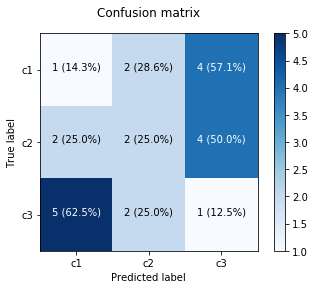

              precision    recall  f1-score   support

           0       0.12      0.14      0.13         7
           1       0.33      0.25      0.29         8
           2       0.11      0.12      0.12         8

    accuracy                           0.17        23
   macro avg       0.19      0.17      0.18        23
weighted avg       0.19      0.17      0.18        23



In [137]:
# Classification report
plot_confusion_matrix(y_true=y_test, y_pred=pred_test, classes=classes)
print (classification_report(y_test, pred_test))

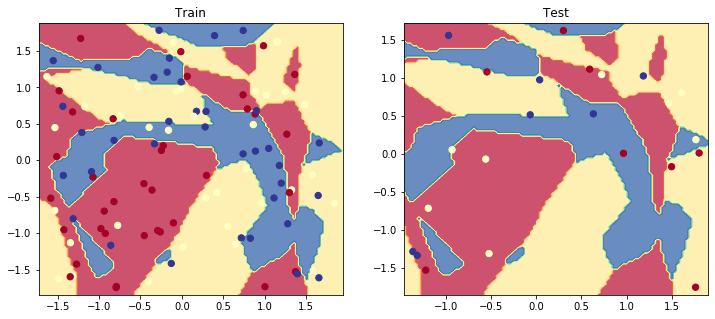

In [85]:
# Visualize the decision boundary
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=standardized_X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=standardized_X_test, y=y_test)
plt.show()

It's important that we experiment, starting with simple models that underfit (high bias) and improve it towards a good fit. Starting with simple models (linear/logistic regression) let's us catch errors without the added complexity of more sophisticated models (neural networks). 

<img src="https://raw.githubusercontent.com/practicalAI/images/master/basic_ml/06_Multilayer_Perceptron/fit.png" width="700">

---
<div align="center">

Subscribe to our <a href="https://practicalai.me/#newsletter">newsletter</a> and follow us on social media to get the latest updates!

<a class="ai-header-badge" target="_blank" href="https://github.com/practicalAI/practicalAI">
              <img src="https://img.shields.io/github/stars/practicalAI/practicalAI.svg?style=social&label=Star"></a>&nbsp;
            <a class="ai-header-badge" target="_blank" href="https://www.linkedin.com/company/practicalai-me">
              <img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social"></a>&nbsp;
            <a class="ai-header-badge" target="_blank" href="https://twitter.com/practicalAIme">
              <img src="https://img.shields.io/twitter/follow/practicalAIme.svg?label=Follow&style=social">
            </a>
              </div>

</div>